## Overview Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

In [61]:
data_dir = '../../data/'
output_file = data_dir+'image_visualization/'

try:
    os.mkdir(output_file)
except:
    print(output_file+ "exits")

../../data/image_visualization/exits


In [62]:
ped_data = pd.read_csv('../../data/pediatric_patients_report_drug_reaction.csv.gz',compression='gzip', index_col=0)

In [63]:
ped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881396 entries, 1 to 1754669
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_custom_master_age       881396 non-null  float64
 1   patient_custom_master_age_unit  881396 non-null  object 
 2   patient_onsetage                881396 non-null  float64
 3   patient_onsetageunit            881396 non-null  object 
 4   patient_sex                     881396 non-null  object 
 5   safetyreportid                  881396 non-null  object 
 6   nichd                           881396 non-null  object 
 7   ich_ema                         639944 non-null  object 
 8   fda                             529859 non-null  object 
 9   lastupdate_date                 881396 non-null  object 
 10  mostrecent_receive_date         881396 non-null  object 
 11  receive_date                    881396 non-null  object 
 12  congenital_anomali  

In [64]:
print(f"จำนวนข้อมูลทั้งหมด: {ped_data.shape[0]:,} แถว")

จำนวนข้อมูลทั้งหมด: 881,396 แถว


In [65]:
unique_safetyreportid = ped_data['safetyreportid'].nunique()
duplicate_safetyreportid = ped_data['safetyreportid'].duplicated().sum()


print(f'จำนวนรายงานที่ไม่มีการซ้ำกันคือ {unique_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานที่มีการซ้ำกันคือ {duplicate_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานทั้งหมดคือ {unique_safetyreportid + duplicate_safetyreportid:,} รายงาน จะเท่ากับข้อมูลต้นฉบับ {len(ped_data):,} รายงาน')

จำนวนรายงานที่ไม่มีการซ้ำกันคือ 113,665 รายงาน
จำนวนรายงานที่มีการซ้ำกันคือ 767,731 รายงาน
จำนวนรายงานทั้งหมดคือ 881,396 รายงาน จะเท่ากับข้อมูลต้นฉบับ 881,396 รายงาน


In [66]:
drug_unique = ped_data['medicinal_product'].nunique()
reaction_unique = ped_data['reaction_meddrapt'].nunique()
print(f'จำนวนยาที่ไม่ซ้ำกันทั้งหมด: {drug_unique:,} รายการ')
print(f'จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: {reaction_unique:,} รายการ')

จำนวนยาที่ไม่ซ้ำกันทั้งหมด: 16,536 รายการ
จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: 12,231 รายการ


In [67]:
# จำนวน reaction ที่แต่ละยาเกิดขึ้น
drug_reaction_count = ped_data.groupby('medicinal_product')['reaction_meddrapt'].nunique().reset_index()
drug_reaction_count.columns = ['medicinal_product', 'num_unique_reactions']
drug_reaction_count.sort_values(by='num_unique_reactions', ascending=False)

,medicinal_product,num_unique_reactions
9776,METHOTREXATE,2424
4405,CYCLOSPORINE,1949
4385,CYCLOPHOSPHAMIDE,1918
201,ACCUTANE,1741
12387,PREDNISOLONE,1684
...,...,...
14454,TAMSULOSIN DURA,1
14445,TALVOSILEN,1
14443,TALOXA ORAL SUSPENSION (FELBAMATE),1
14436,TALINOLOL,1


In [68]:
# จำนวน ยา ที่พบ reaction
drug_reaction_count = ped_data.groupby('reaction_meddrapt')['medicinal_product'].nunique().reset_index()
drug_reaction_count.columns = ['reaction_meddrapt', 'num_unique_drugs']
drug_reaction_count.sort_values(by='num_unique_drugs', ascending=False)

,reaction_meddrapt,num_unique_drugs
9326,PYREXIA,2575
12001,VOMITING,2561
2649,CONVULSION,2038
7744,NAUSEA,1820
3425,DRUG INEFFECTIVE,1727
...,...,...
8757,PHYSICAL PRODUCT LABEL ISSUE,1
20,ABDOMINAL OPERATION,1
1511,BONE ABSCESS,1
12223,YERSINIA INFECTION,1


### Part 1 Patient

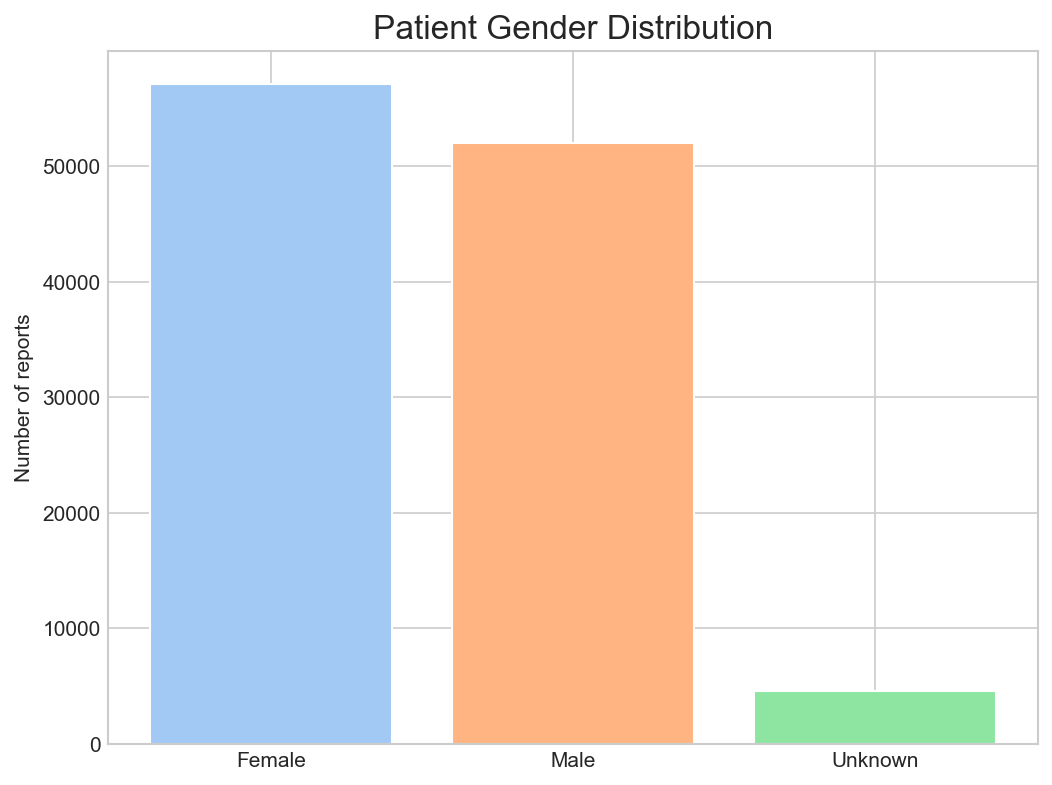

In [69]:
# 1.1 การวิเคราะห์สัดส่วนเพศของผู้ป่วย (patient_sex)
rep = ped_data.drop_duplicates('safetyreportid').copy()

plt.figure(figsize=(8, 6))
sex_counts = rep['patient_sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=sns.color_palette('pastel'))
plt.title('Patient Gender Distribution', fontsize=16)
plt.ylabel('Number of reports')
plt.savefig(output_file+'1_1_patient_gender_distribution.png')
plt.show()


/tmp/ipykernel_15559/3452039545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='nichd', data=ped_data, order=ped_data['nichd'].value_counts().index, palette='viridis')


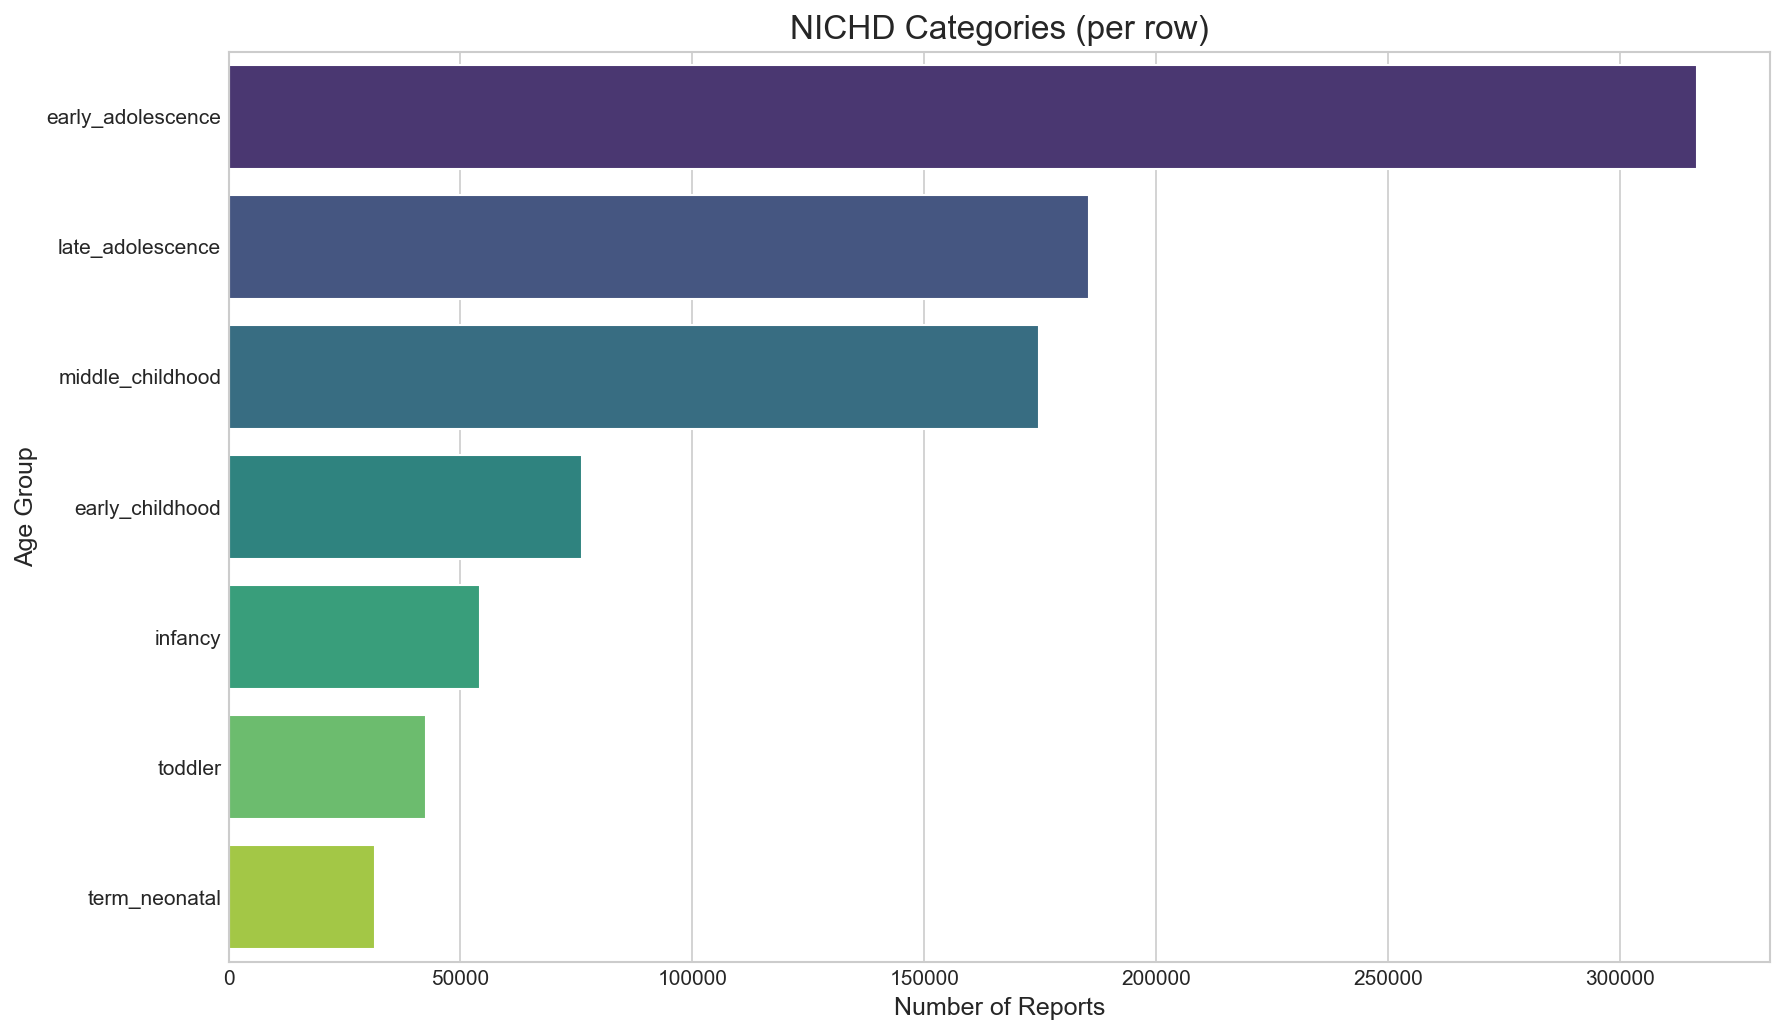

In [70]:
# 1.2 การวิเคราะห์การกระจายตัวของกลุ่มอายุตาม NICHD (nichd)
plt.figure(figsize=(12, 7))
# เรียงลำดับกลุ่มอายุเพื่อให้กราฟดูง่าย
sns.countplot(y='nichd', data=ped_data, order=ped_data['nichd'].value_counts().index, palette='viridis')
plt.title('NICHD Categories (per row)', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'1_2_nichd_distribution.png')
plt.show()

/tmp/ipykernel_15559/337032582.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=nichd_counts_nodup.index,


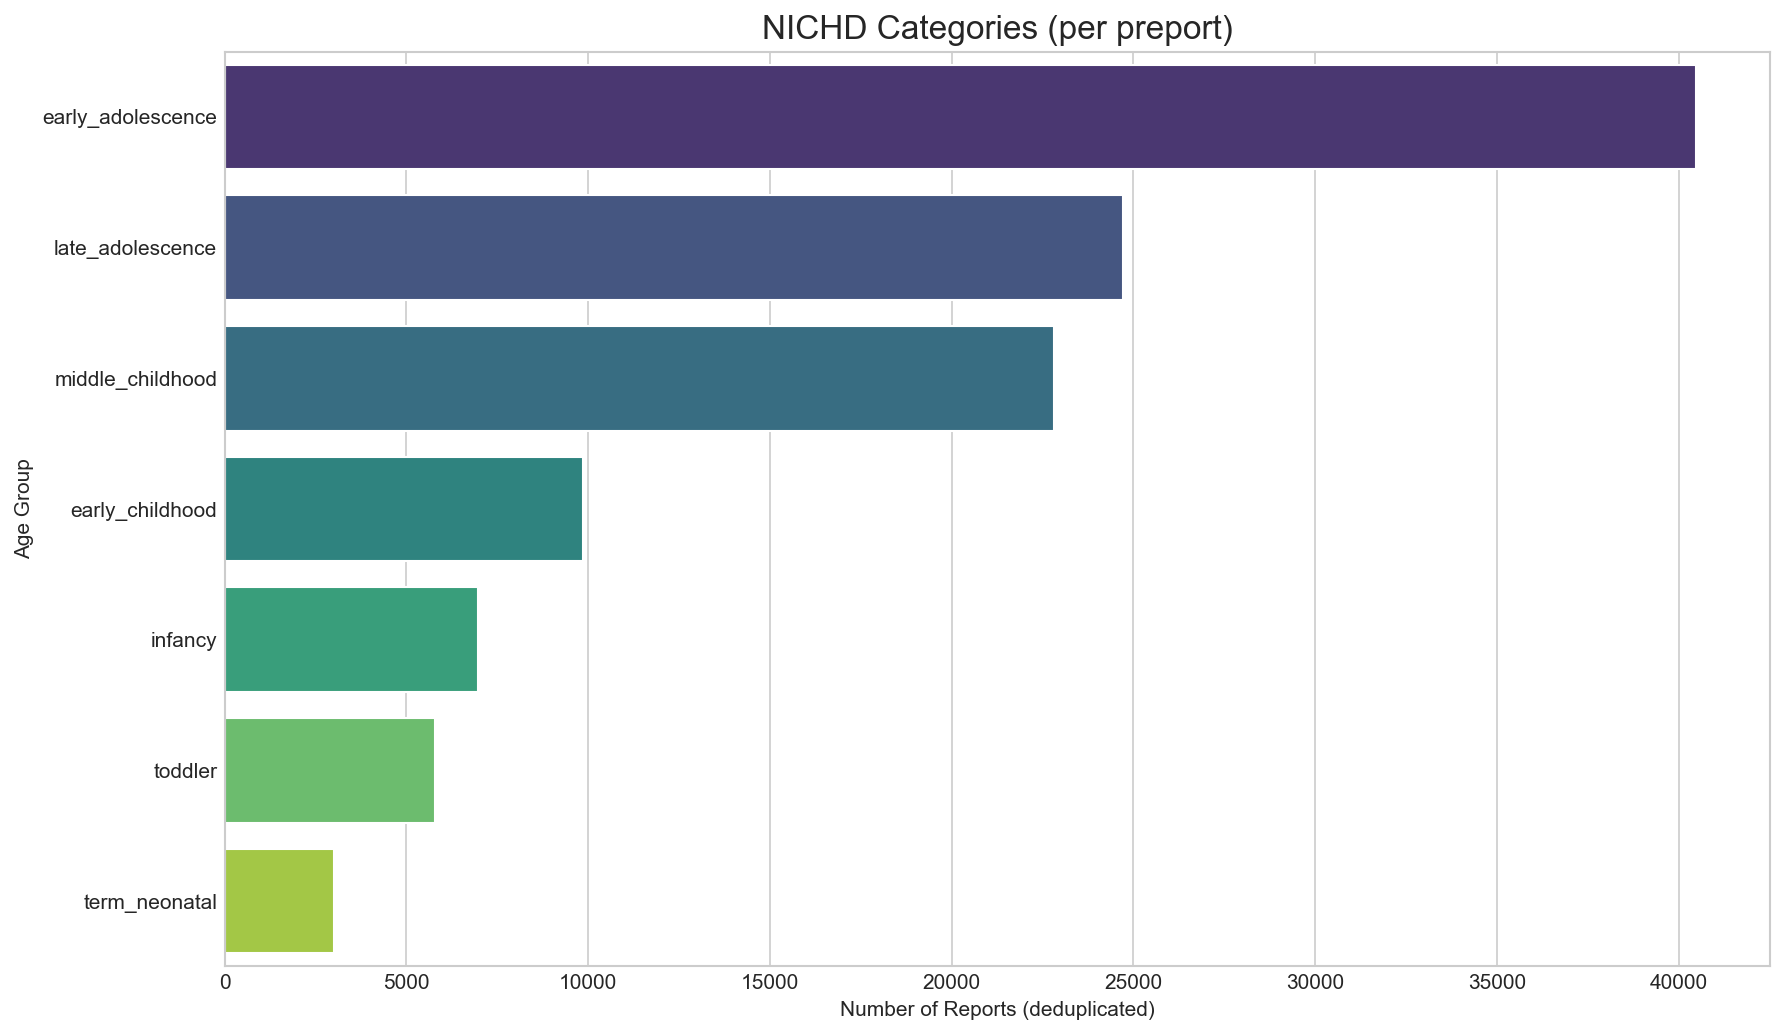

In [71]:
rep = ped_data.drop_duplicates('safetyreportid').copy()

nichd_counts_nodup = (rep['nichd']
                      .value_counts()
                      .loc[['term_neonatal','infancy','toddler',
                            'early_childhood','middle_childhood',
                            'early_adolescence','late_adolescence']]
                      .sort_values(ascending=False))


plt.figure(figsize=(12, 7))
sns.barplot(y=nichd_counts_nodup.index,
            x=nichd_counts_nodup.values,
            palette='viridis')
plt.title('NICHD Categories (per preport)', fontsize=16)
plt.xlabel('Number of Reports (deduplicated)')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


In [72]:
values = ped_data.groupby('safetyreportid')['patient_custom_master_age'].agg('mean').dropna().values
print("จำนวนค่าเฉลี่ยอายุที่ไม่เป็น NaN:", len(values))
print("สัดส่วนต่อจำนวนทั้งหมด:", len(values) / ped_data.shape[0])

จำนวนค่าเฉลี่ยอายุที่ไม่เป็น NaN: 113665
สัดส่วนต่อจำนวนทั้งหมด: 0.12896019496344435


In [73]:
sensical_values = values[(values >= 0) & (values <= 21)]
floored = np.floor(sensical_values).astype(int)
years, counts = np.unique(floored, return_counts=True)

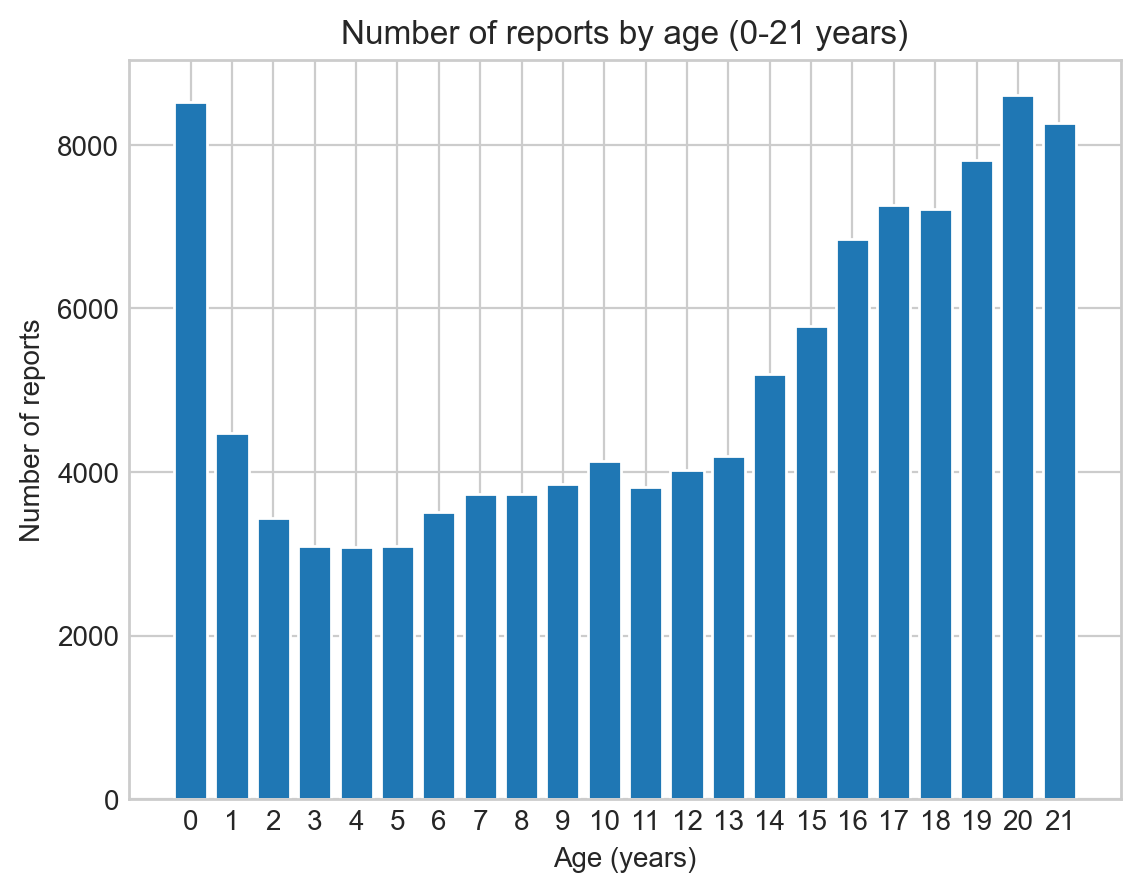

In [74]:
all_years = np.arange(0, 22)
all_counts = np.zeros_like(all_years)
for i, y in enumerate(all_years):
    if y in years:
        all_counts[i] = counts[np.where(years == y)[0][0]]


plt.figure(dpi=200)
plt.bar(all_years, all_counts)
plt.xticks(all_years)
plt.xlabel("Age (years)")
plt.ylabel("Number of reports")
plt.title("Number of reports by age (0-21 years)")
plt.savefig(output_file+'1_3_age_distribution.png')
plt.show()

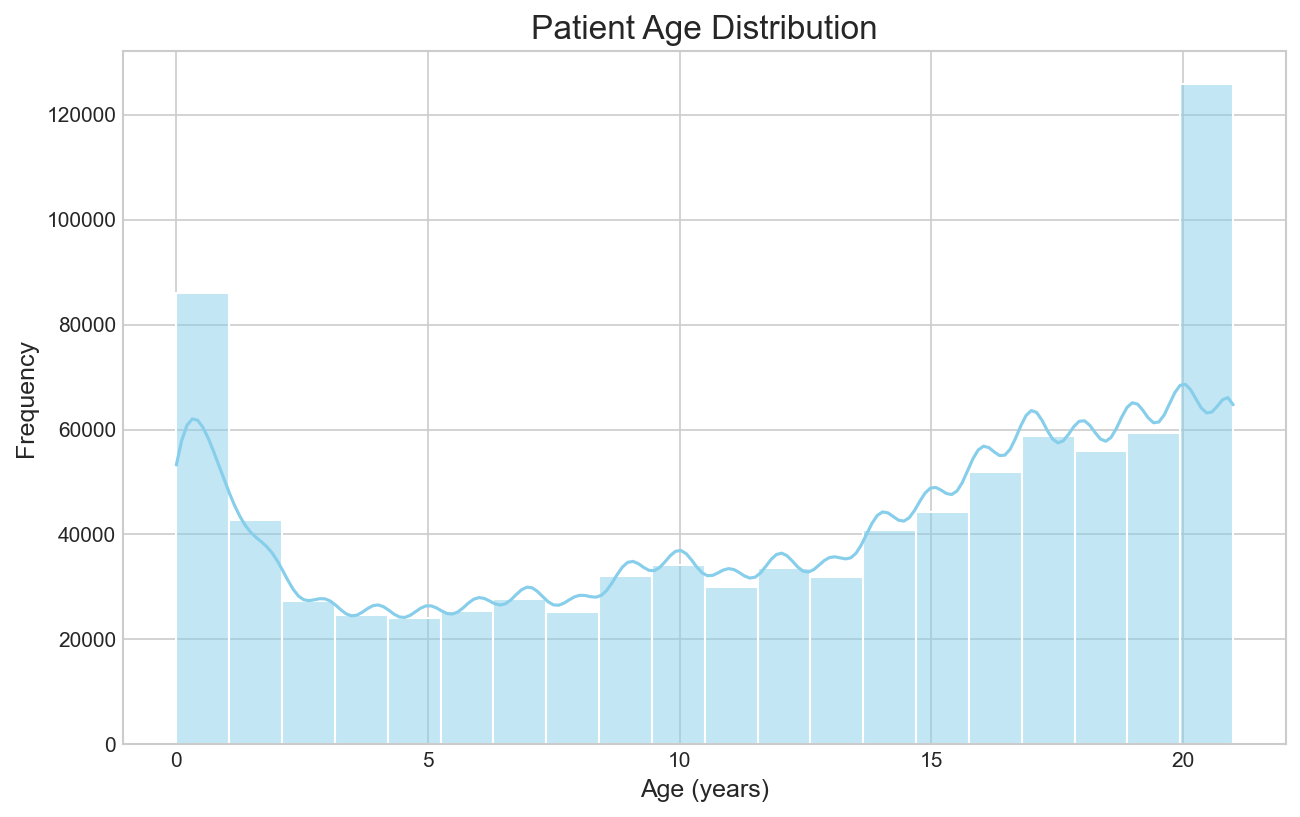

In [75]:
# 1.3 การวิเคราะห์การกระจายตัวของอายุ (patient_custom_master_age)
plt.figure(figsize=(10, 6))
# กรองข้อมูลที่เป็นค่าว่างออกไปก่อนพล็อต
sns.histplot(ped_data['patient_custom_master_age'], bins=20, kde=True, color='skyblue')
plt.title('Patient Age Distribution', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
median_age = ped_data['patient_custom_master_age'].median()
# plt.axvline(median_age, color='red', linestyle='--', linewidth=2)
# plt.text(median_age + 2, plt.ylim()[1]*0.9, f'Median Age: {median_age:.1f}', color='red')
# plt.savefig(output_file+'1_3_age_distribution.png')
plt.show()

In [76]:
most_common_age = ped_data['patient_custom_master_age'].mode().iloc[0]
print(f"อายุที่พบบ่อยที่สุดคือ: {most_common_age}")


อายุที่พบบ่อยที่สุดคือ: 20.0


In [77]:
# pediatric_patient_df = (ped_data.
#                         query('patient_onsetage>0 & patient_onsetage<21'))
# df = pediatric_patient_df[['patient_onsetageunit','patient_onsetage']].query('patient_onsetage<21').copy()
# df['patient_onsetage'] = np.floor(df['patient_onsetage'])
# df['mem'] = 1.
# df_pivot = df.pivot_table(index='patient_onsetage',columns='patient_onsetageunit',
#                           values='mem',aggfunc=sum,fill_value=0)
# order=['Decade','Year','Month','Week','Day','Hour']
# df_pivot = df_pivot[order].apply(lambda x : x / sum(x),axis=1).round(2)
# display(df_pivot.T)
# fig,ax=plt.subplots(dpi=200)
# g = df_pivot.plot(kind='bar',stacked=True,ax=ax)
# g.legend(bbox_to_anchor=(1,1))
# g = g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [78]:
print(f"\nสรุปข้อมูลเบื้องต้นของผู้ป่วย:")
print(f"จำนวนข้อมูลทั้งหมด: {len(ped_data):,} รายงาน")
print(f"สัดส่วนเพศ:\n{sex_counts}")
print(f"\nค่าเฉลี่ยอายุ (ณ เวลาที่รายงาน): {ped_data['patient_custom_master_age'].mean():.2f} ปี (ค่ามัธยฐาน: {median_age:.2f} ปี)")


สรุปข้อมูลเบื้องต้นของผู้ป่วย:
จำนวนข้อมูลทั้งหมด: 881,396 รายงาน
สัดส่วนเพศ:
patient_sex
Female     57128
Male       51996
Unknown     4541
Name: count, dtype: int64

ค่าเฉลี่ยอายุ (ณ เวลาที่รายงาน): 11.92 ปี (ค่ามัธยฐาน: 13.00 ปี)


### Part 2 Report Characteristics

/tmp/ipykernel_15559/884595766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reporter_qualification',


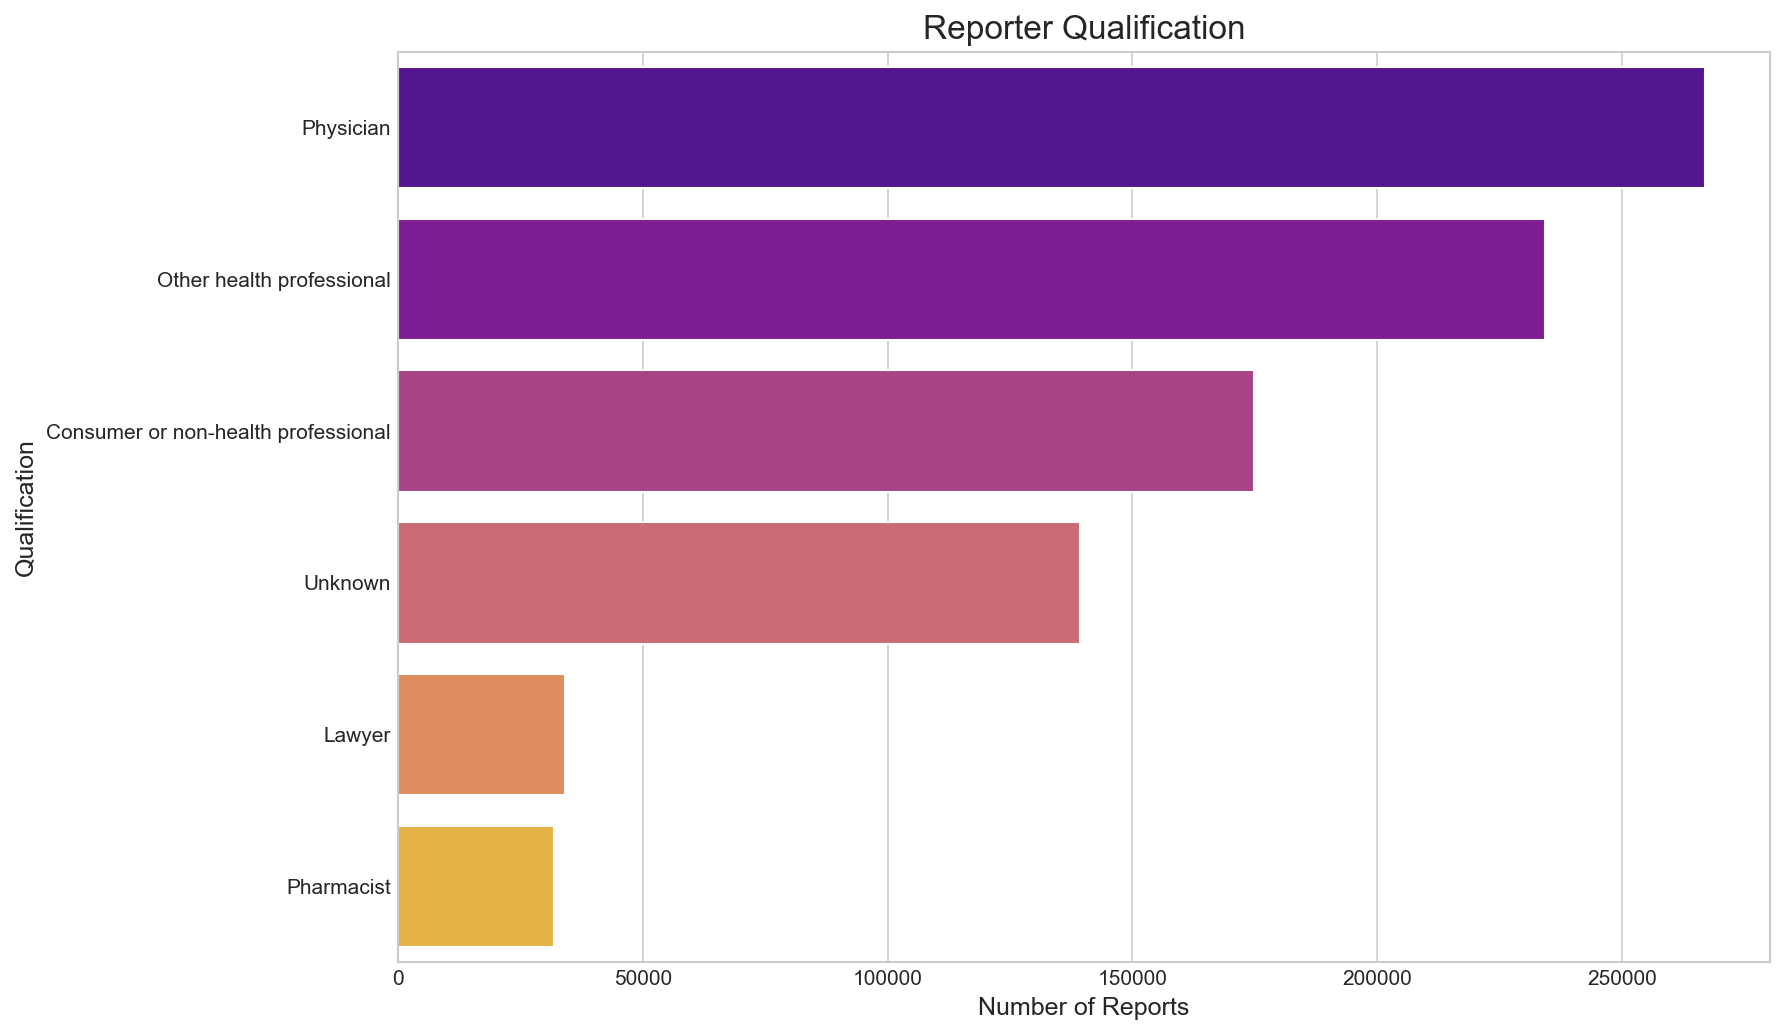

In [79]:
# 2.1 การวิเคราะห์คุณสมบัติของผู้รายงาน (reporter_qualification)
plt.figure(figsize=(12, 7))
sns.countplot(y='reporter_qualification',
              data=ped_data,
              order=ped_data['reporter_qualification'].value_counts().index,
              palette='plasma')
plt.title('Reporter Qualification', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Qualification', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'2_1_reporter_qualification.png')
plt.show()

/tmp/ipykernel_15559/494184110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


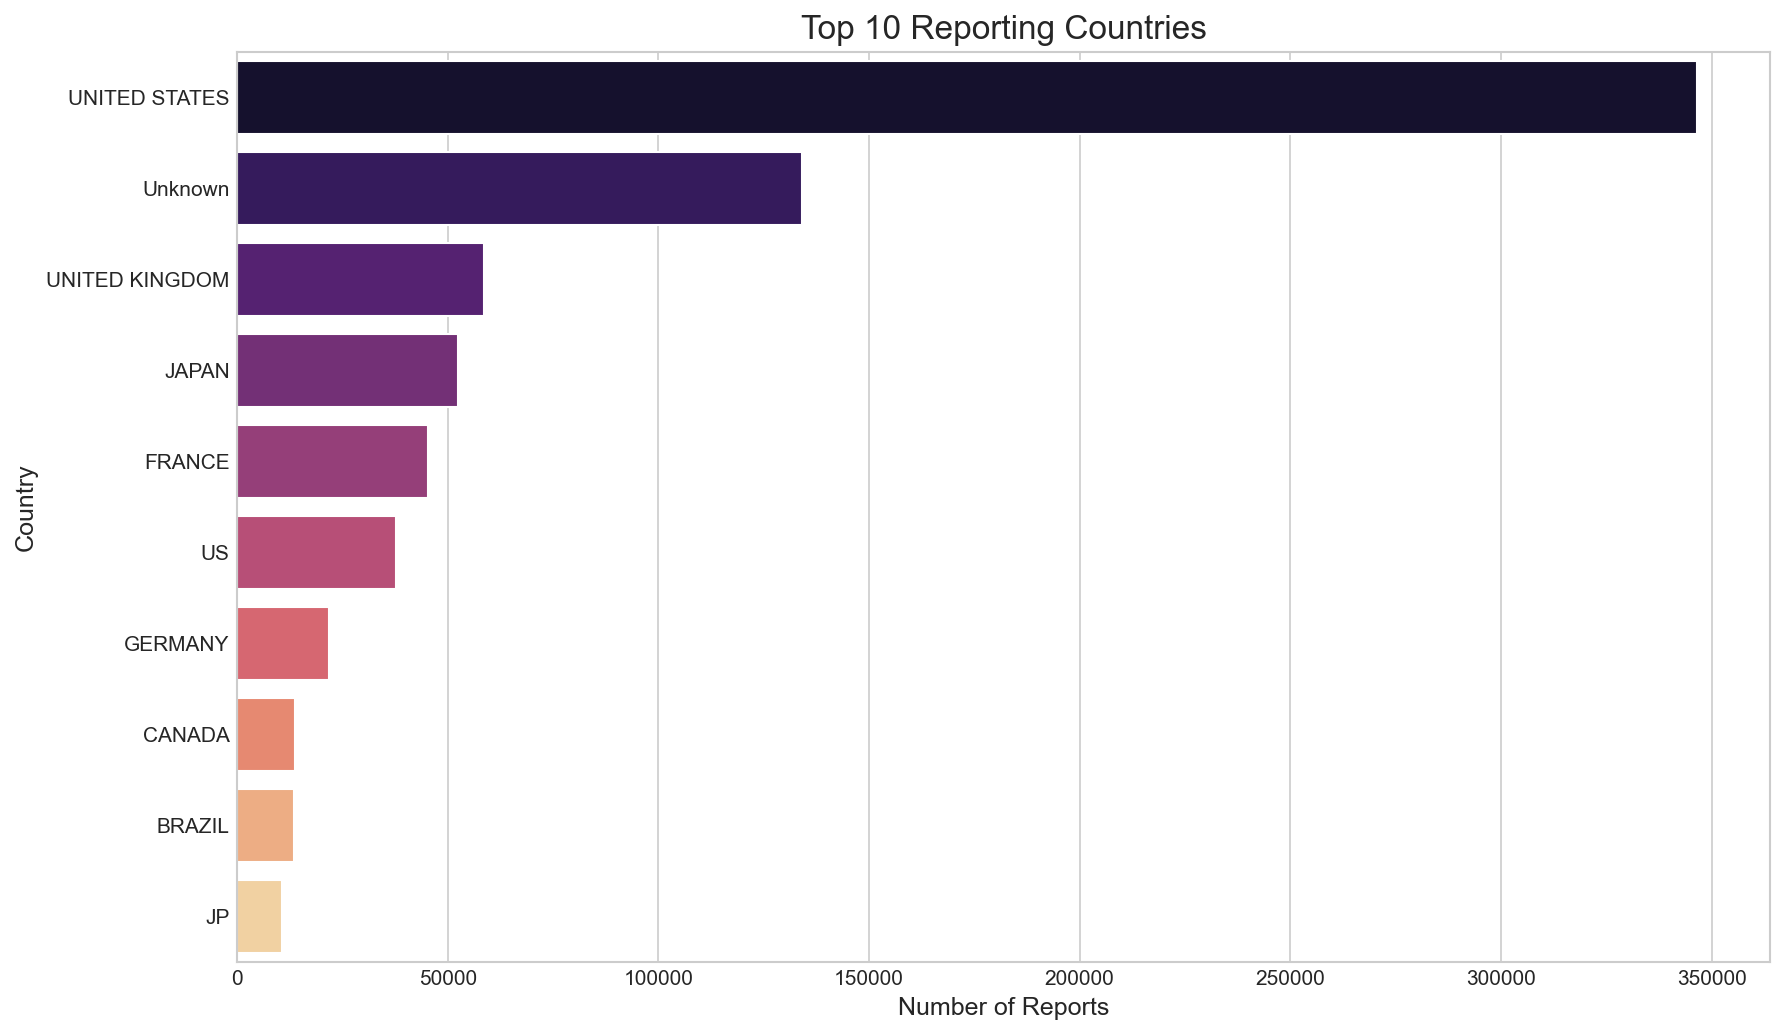

In [80]:
# 2.2 การวิเคราะห์ประเทศที่ส่งรายงาน (reporter_country) - แสดง 10 อันดับแรก
plt.figure(figsize=(12, 7))
top_10_countries = ped_data['reporter_country'].value_counts().nlargest(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 Reporting Countries', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'2_2_reporter_country.png')
plt.show()

/tmp/ipykernel_15559/525196535.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reports = ped_data.set_index('receive_date').resample('M').size()


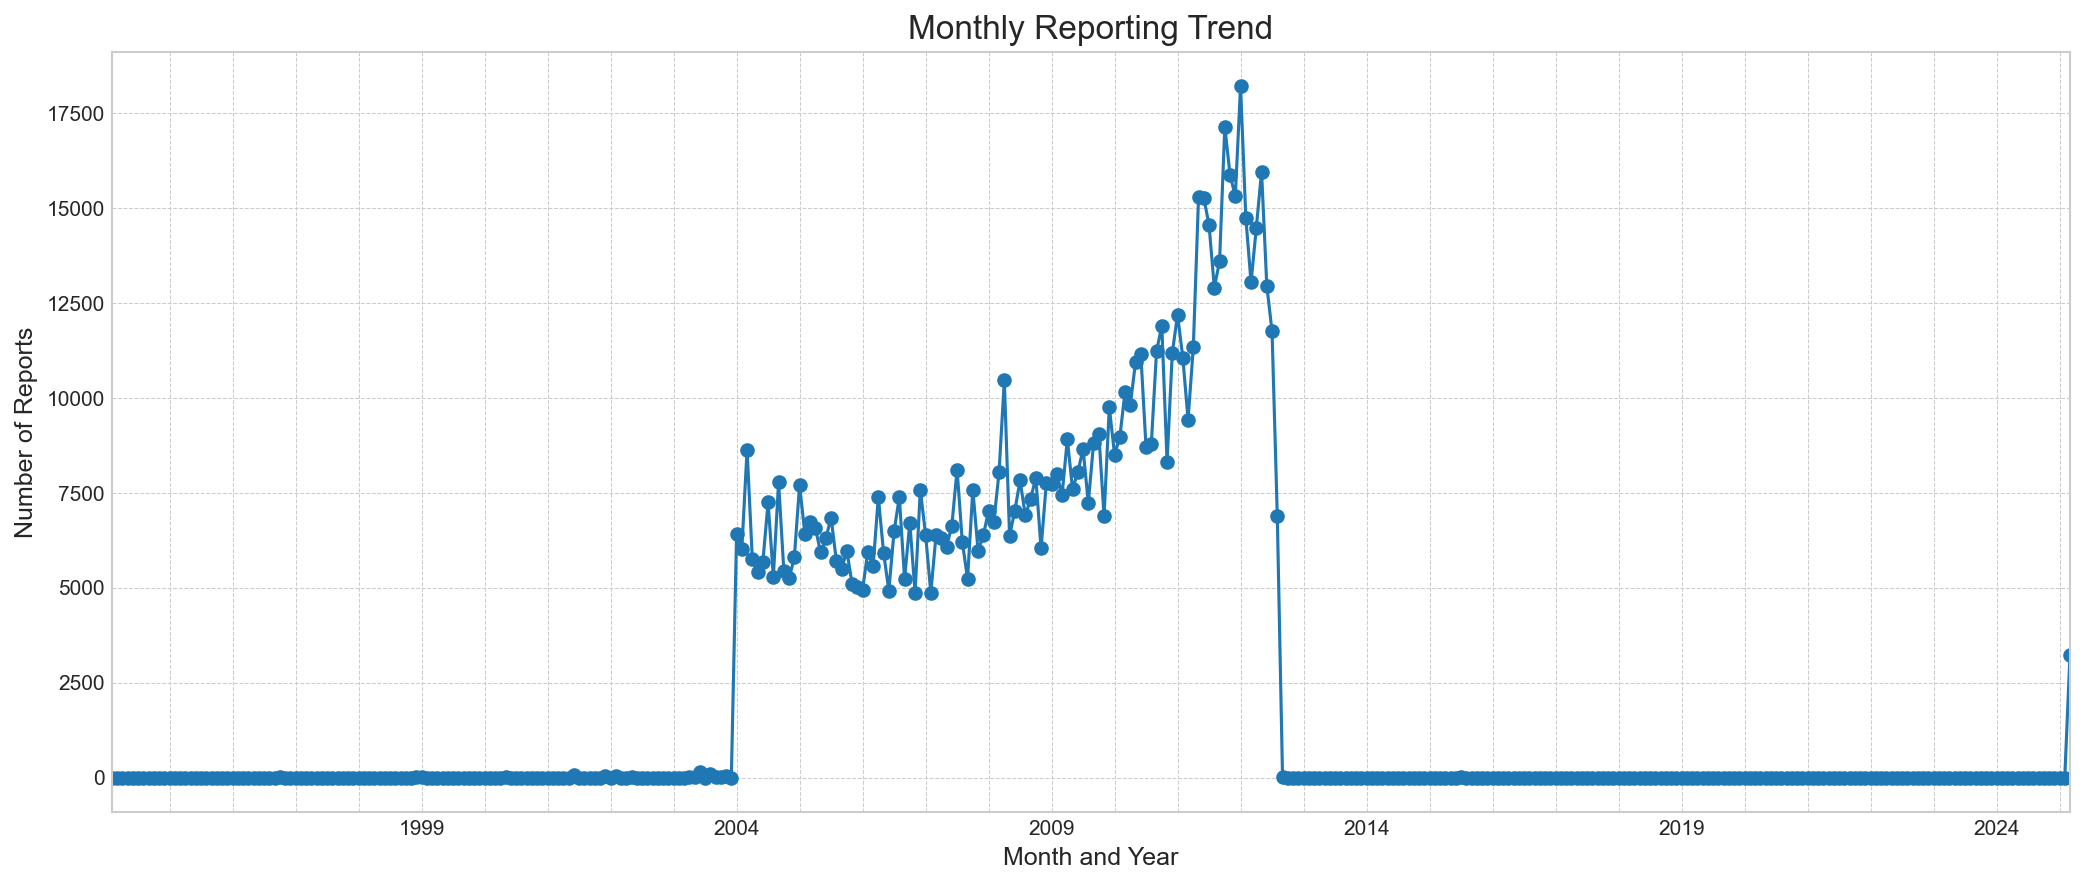

In [81]:
# 2.3 การวิเคราะห์แนวโน้มการรายงานตามช่วงเวลา (receive_date)
# แปลงคอลัมน์ 'receive_date' ให้เป็น datetime ก่อน
ped_data['receive_date'] = pd.to_datetime(ped_data['receive_date'])

# นับจำนวนรายงานในแต่ละเดือน
monthly_reports = ped_data.set_index('receive_date').resample('M').size()

plt.figure(figsize=(14, 6))
monthly_reports.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Reporting Trend', fontsize=16)
plt.xlabel('Month and Year', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(output_file+'2_3_report_trend_by_month.png')
plt.show()

In [83]:
# rep["year_month"] = rep["receive_date"].dt.to_period("M")

# # -- นับจำนวนต่อเดือน ---------------------------
# month_cnt = (rep["year_month"]
#              .value_counts()
#              .sort_index()
#              .rename_axis("ym")
#              .reset_index(name="reports"))
# month_cnt["ym_dt"] = month_cnt["ym"].dt.to_timestamp()  


# plt.figure(figsize=(12,4))
# sns.lineplot(data=month_cnt, x="ym_dt", y="reports", marker="o")
# plt.title("Reports per Month (deduplicated)"); plt.xlabel("Month"); plt.ylabel("Reports")
# plt.tight_layout(); plt.show()


In [84]:
odd = rep.loc[rep["report_year"] < 1996, ["safetyreportid", "receive_date"]]
print(f"เจอ {len(odd):,} รายงานก่อนปี 2000")
display(odd.head())


KeyError: 'report_year'

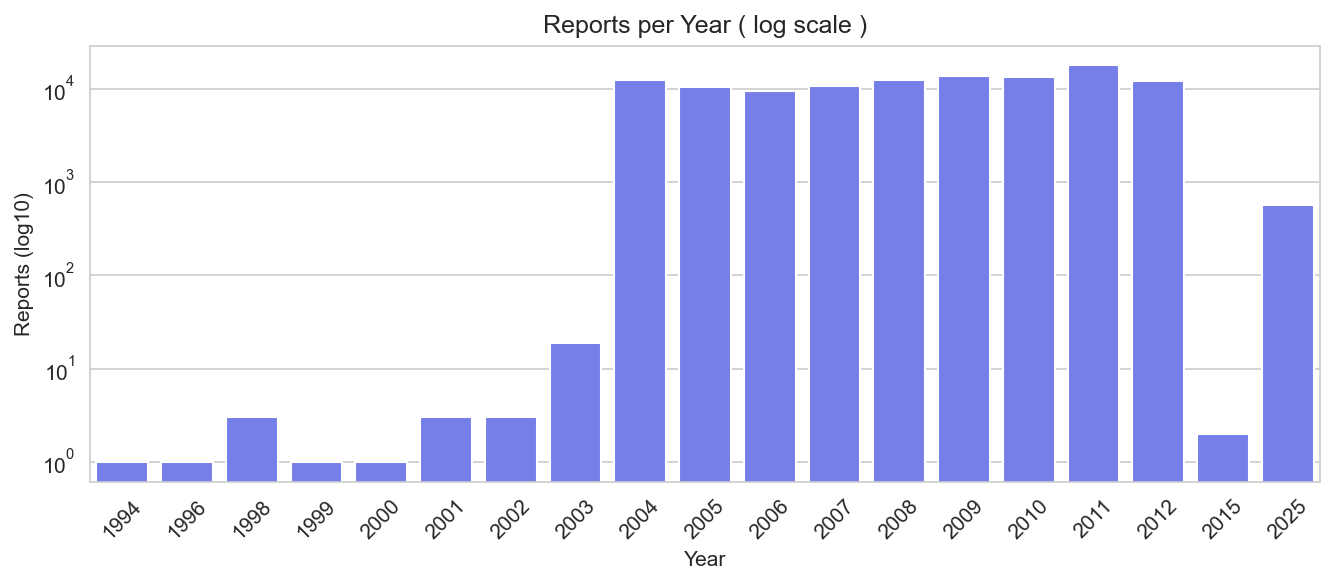

In [97]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style("whitegrid"); plt.rcParams["figure.dpi"] = 150

# -- โหลดและเตรียมวันที่ -----------------------------------------
df = ped_data      
df["receive_date"] = pd.to_datetime(df["receive_date"], errors="coerce")

# -- ตัดซ้ำให้เหลือ “หนึ่งรายงานต่อ safetyreportid” --------------
rep = df.drop_duplicates("safetyreportid").copy()
rep["report_year"] = rep["receive_date"].dt.year

# -- กราฟจำนวนรายงานต่อปี ----------------------------------------
year_cnt = rep["report_year"].value_counts().sort_index()

plt.figure(figsize=(9,4))
sns.barplot(x=year_cnt.index.astype(int), y=year_cnt.values, color="#636EFA")
plt.yscale("log")                         
plt.title("Reports per Year ( log scale )")
plt.xlabel("Year"); plt.ylabel("Reports (log10)")
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()



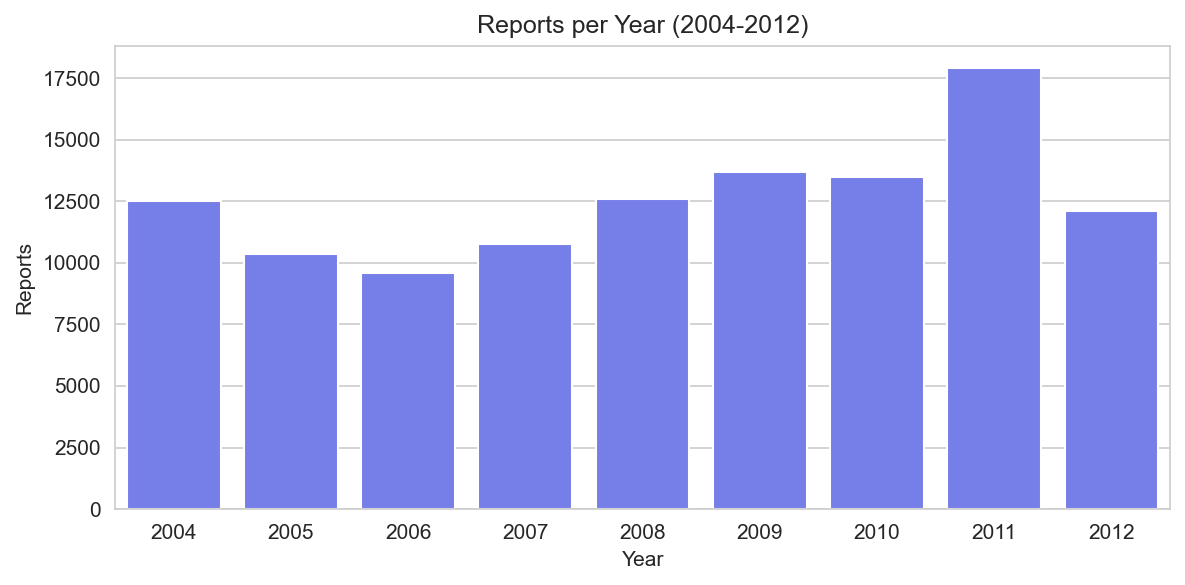

รายงานก่อน 2000 มีทั้งหมด 6 ฉบับ (≈0.01%)


In [100]:
core = year_cnt.loc[2004:2012]
plt.figure(figsize=(8,4))
sns.barplot(x=core.index, y=core.values, color="#636EFA")
plt.title("Reports per Year (2004-2012)")
plt.xlabel("Year"); plt.ylabel("Reports")
plt.tight_layout(); plt.show()

print(f"รายงานก่อน 2000 มีทั้งหมด {year_cnt.loc[:1999].sum()} ฉบับ (≈{year_cnt.loc[:1999].sum()/year_cnt.sum()*100:.2f}%)")

In [85]:
# แถวที่ปี < 2000
odd = rep.loc[rep["report_year"] < 2000, ["safetyreportid", "receive_date"]]
print(f"เจอ {len(odd):,} รายงานก่อนปี 2000")
display(odd.head())


KeyError: 'report_year'

/tmp/ipykernel_15559/854391976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep["update_year"] = rep["lastupdate_date"].dt.year


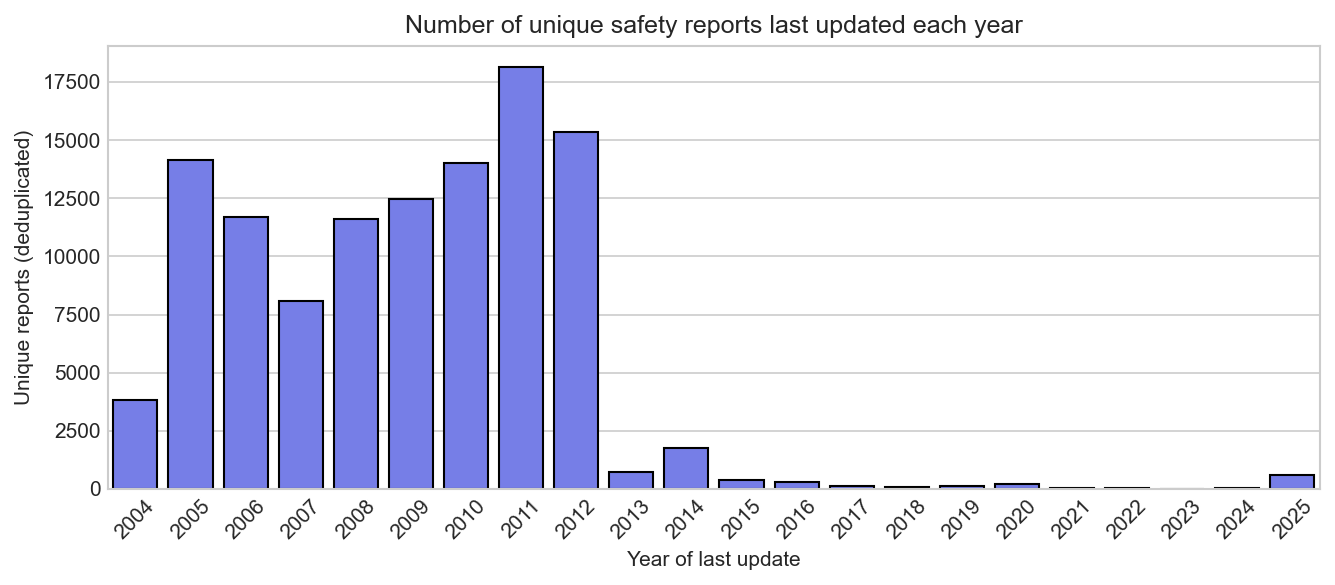

In [86]:
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 150

df = ped_data.copy()
df["lastupdate_date"] = pd.to_datetime(df["lastupdate_date"], errors="coerce")

rep = df.drop_duplicates("safetyreportid")
rep["update_year"] = rep["lastupdate_date"].dt.year

year_cnt = rep["update_year"].value_counts().sort_index()

plt.figure(figsize=(9, 4))
sns.barplot(
    x=year_cnt.index.astype(int),
    y=year_cnt.values,
    color="#636EFA",
    edgecolor="k",
)

plt.title("Number of unique safety reports last updated each year")
plt.xlabel("Year of last update")
plt.ylabel("Unique reports (deduplicated)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [87]:
ped_data['serious'].unique()
ped_data.loc[(ped_data['congenital_anomali']== 0)&(ped_data['death']==0) & (ped_data['disabling']==0), ['safetyreportid','congenital_anomali','death','disabling','life_threatening','other','serious']]
ped_data.loc[ped_data['safetyreportid']=='25129802',['safetyreportid','serious','medicinal_product','reaction_meddrapt','reaction_outcome']]

,safetyreportid,serious,medicinal_product,reaction_meddrapt,reaction_outcome
307,25129802,"The adverse event resulted in death, a life th...",EMICIZUMAB,Haemorrhage,Unknown


In [88]:
print("\nสรุปข้อมูลเบื้องต้นของการรายงาน:")
print("คุณสมบัติผู้รายงาน 5 อันดับแรก:")
print(ped_data['reporter_qualification'].value_counts().head())
print("\nประเทศที่ส่งรายงาน 5 อันดับแรก:")
print(ped_data['reporter_country'].value_counts().head())


สรุปข้อมูลเบื้องต้นของการรายงาน:
คุณสมบัติผู้รายงาน 5 อันดับแรก:
reporter_qualification
Physician                              266924
Other health professional              234236
Consumer or non-health professional    174920
Unknown                                139367
Lawyer                                  34035
Name: count, dtype: int64

ประเทศที่ส่งรายงาน 5 อันดับแรก:
reporter_country
UNITED STATES     346526
Unknown           134207
UNITED KINGDOM     58629
JAPAN              52454
FRANCE             45304
Name: count, dtype: int64


### Part 3 Drug Profile

In [89]:
ped_data['drug_characterization'].unique()

array(['Suspect (the drug was considered by the reporter to be the cause)',
       'Concomitant (the drug was reported as being taken along with the suspect drug)',
       'Interacting (the drug was considered by the reporter to have interacted with the suspect drug)'],
      dtype=object)

/tmp/ipykernel_15559/3868900732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='drug_characterization_short',


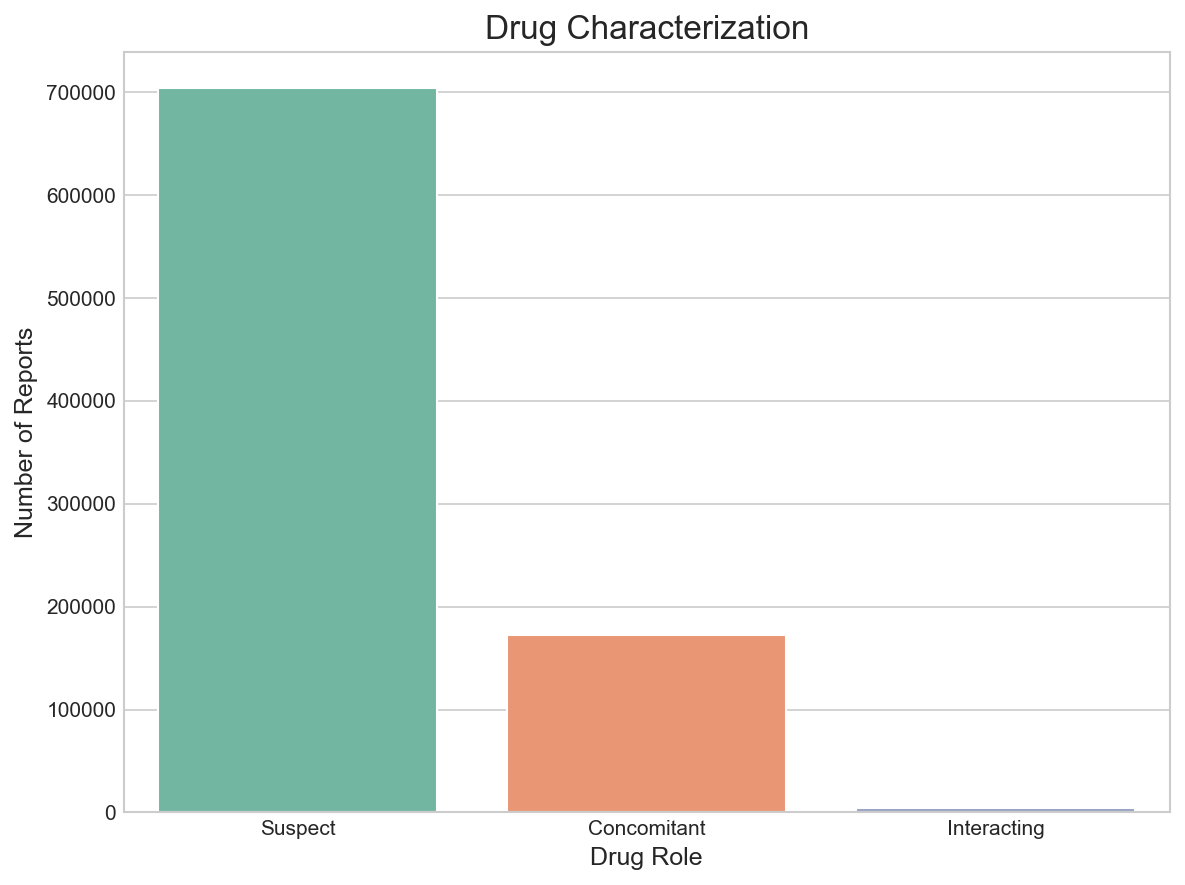

In [90]:
label_map = {
    'Suspect (the drug was considered by the reporter to be the cause)': 'Suspect',
    'Concomitant (the drug was reported as being taken along with the suspect drug)': 'Concomitant',
    'Interacting (the drug was considered by the reporter to have interacted with the suspect drug)': 'Interacting'
}

ped_data['drug_characterization_short'] = ped_data['drug_characterization'].map(label_map)

plt.figure(figsize=(8, 6))
sns.countplot(x='drug_characterization_short',
              data=ped_data,
              order=ped_data['drug_characterization_short'].value_counts().index,
              palette='Set2')
plt.title('Drug Characterization', fontsize=16)
plt.xlabel('Drug Role', fontsize=12)
plt.ylabel('Number of Reports', fontsize=12)
plt.tight_layout()
plt.savefig(output_file + '3_1_drug_characterization_short.png')
plt.show()


/tmp/ipykernel_15559/1772023755.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='rocket')


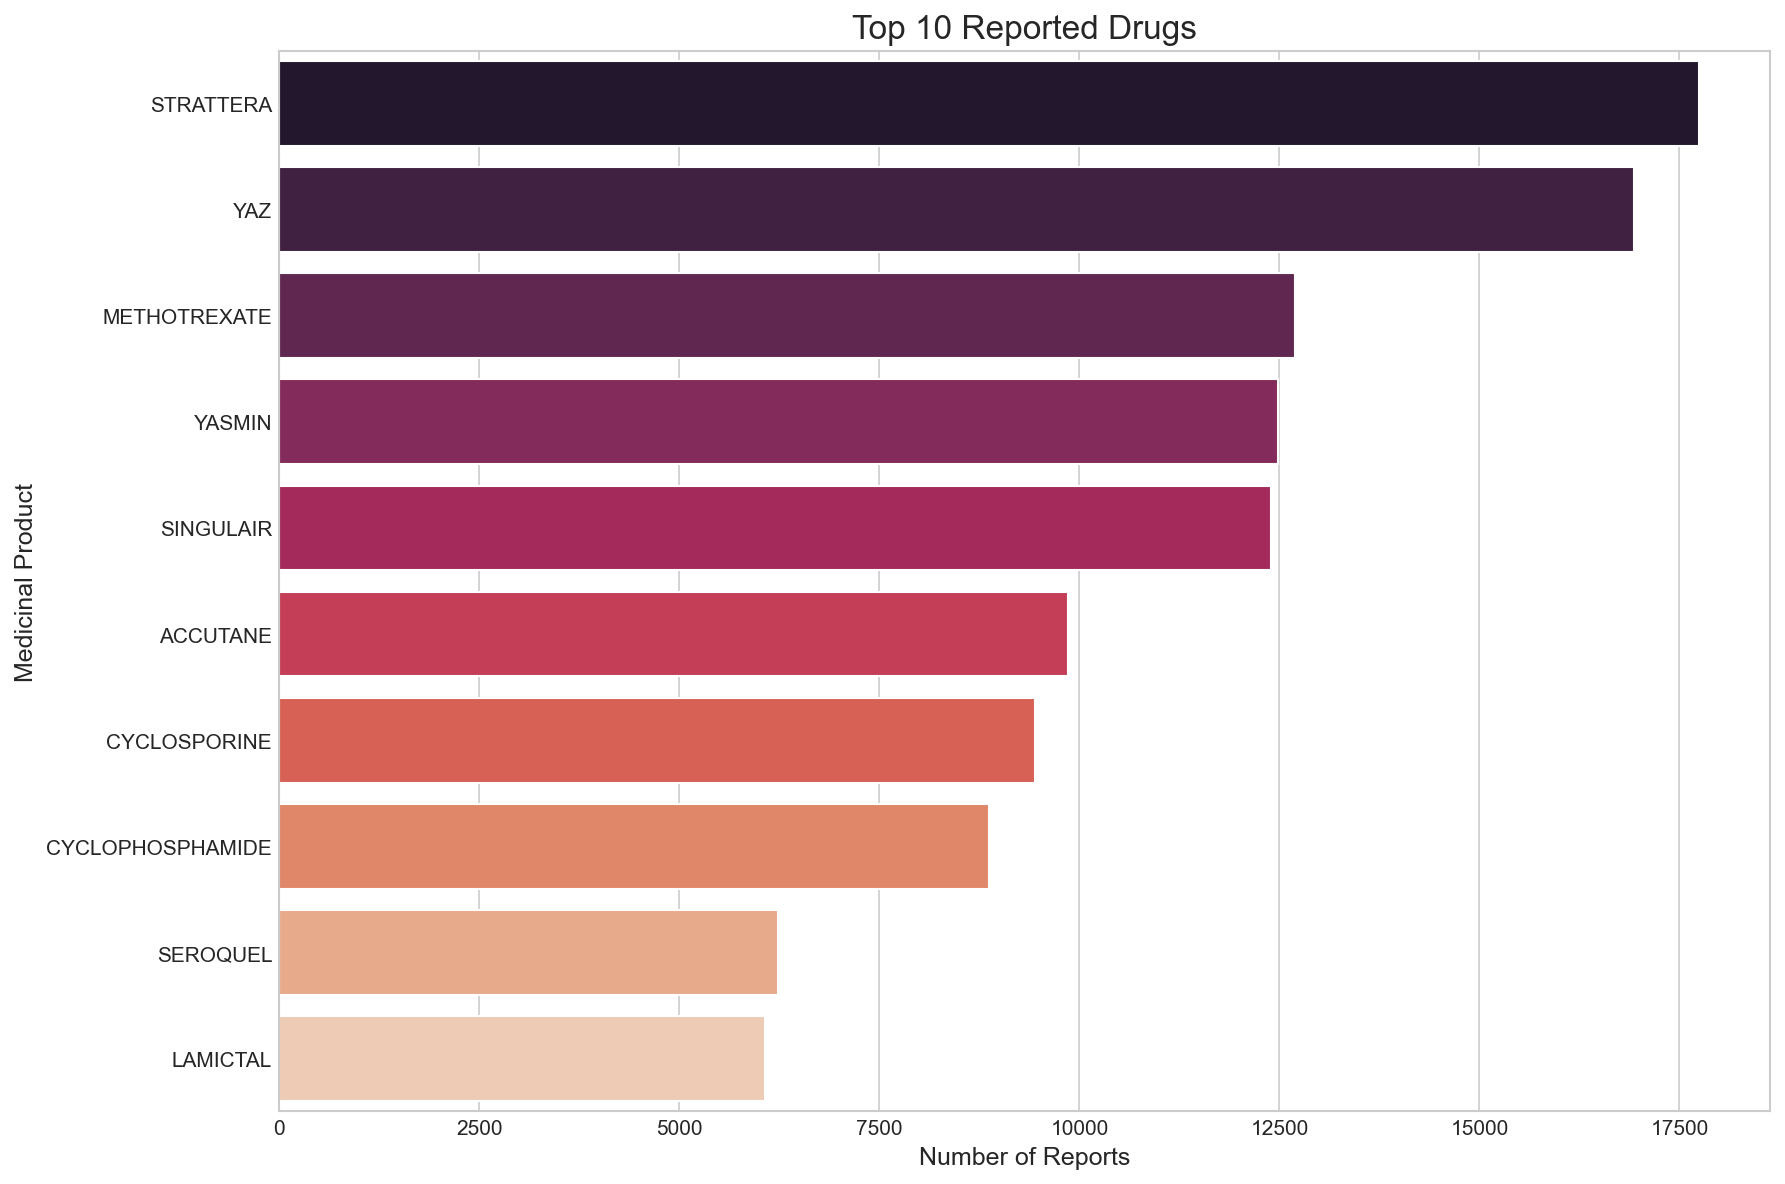

In [91]:
# 3.2 การวิเคราะห์ยาที่ถูกรายงานสูงสุด 10 อันดับ (medicinal_product)
plt.figure(figsize=(12, 8))
top_10_drugs = ped_data['medicinal_product'].value_counts().nlargest(10)
sns.barplot(x=top_10_drugs.values, y=top_10_drugs.index, palette='rocket')
plt.title('Top 10 Reported Drugs', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Medicinal Product', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'3_2_top_10_medicinal_product.png')
plt.show()


/tmp/ipykernel_15559/2012947267.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')


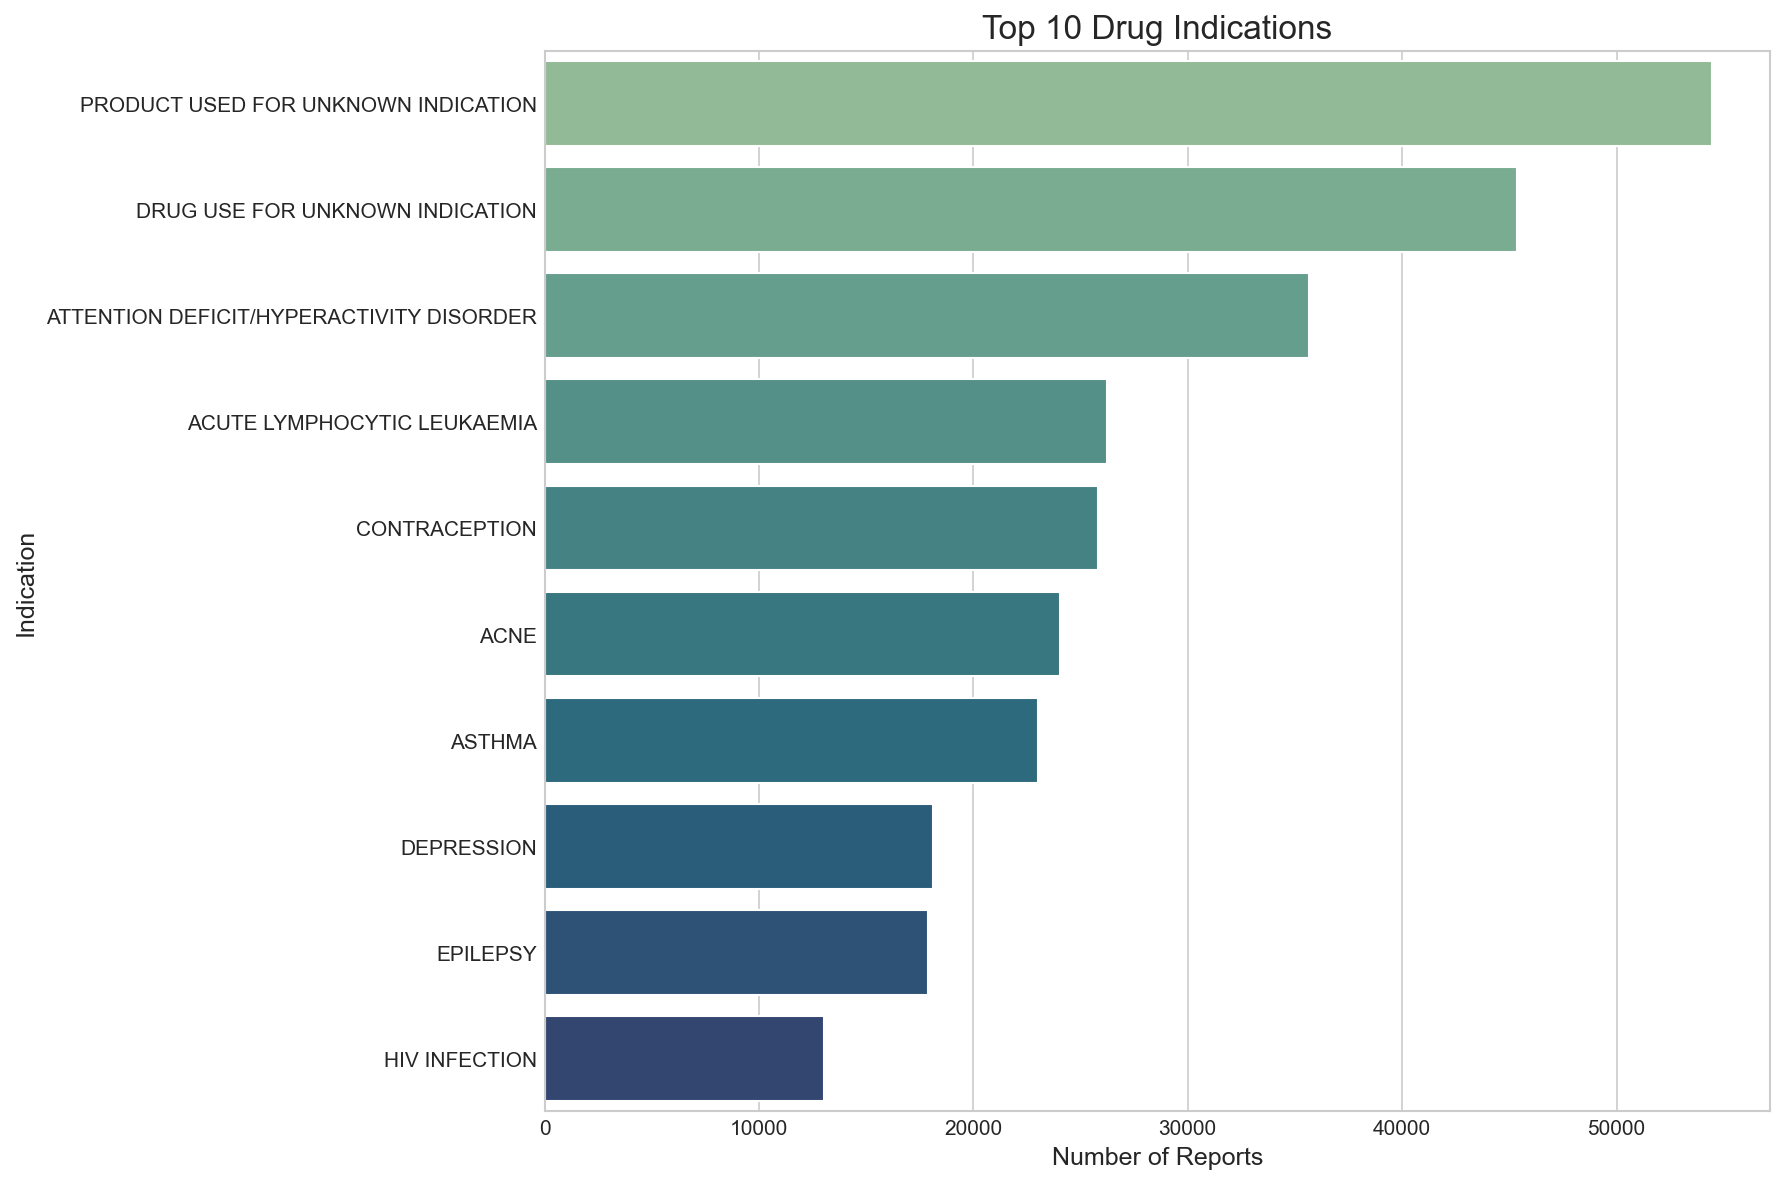

In [92]:
# 3.3 การวิเคราะห์ข้อบ่งใช้ของยาสูงสุด 10 อันดับ (drug_indication)
plt.figure(figsize=(12, 8))
top_10_indications = ped_data['drug_indication'].value_counts().nlargest(10)
sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')
plt.title('Top 10 Drug Indications', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Indication', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'3_3_top_10_drug_indication.png')
plt.show()

In [93]:
ped_data['drug_administration'].nunique()

60

/tmp/ipykernel_15559/2537002867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')


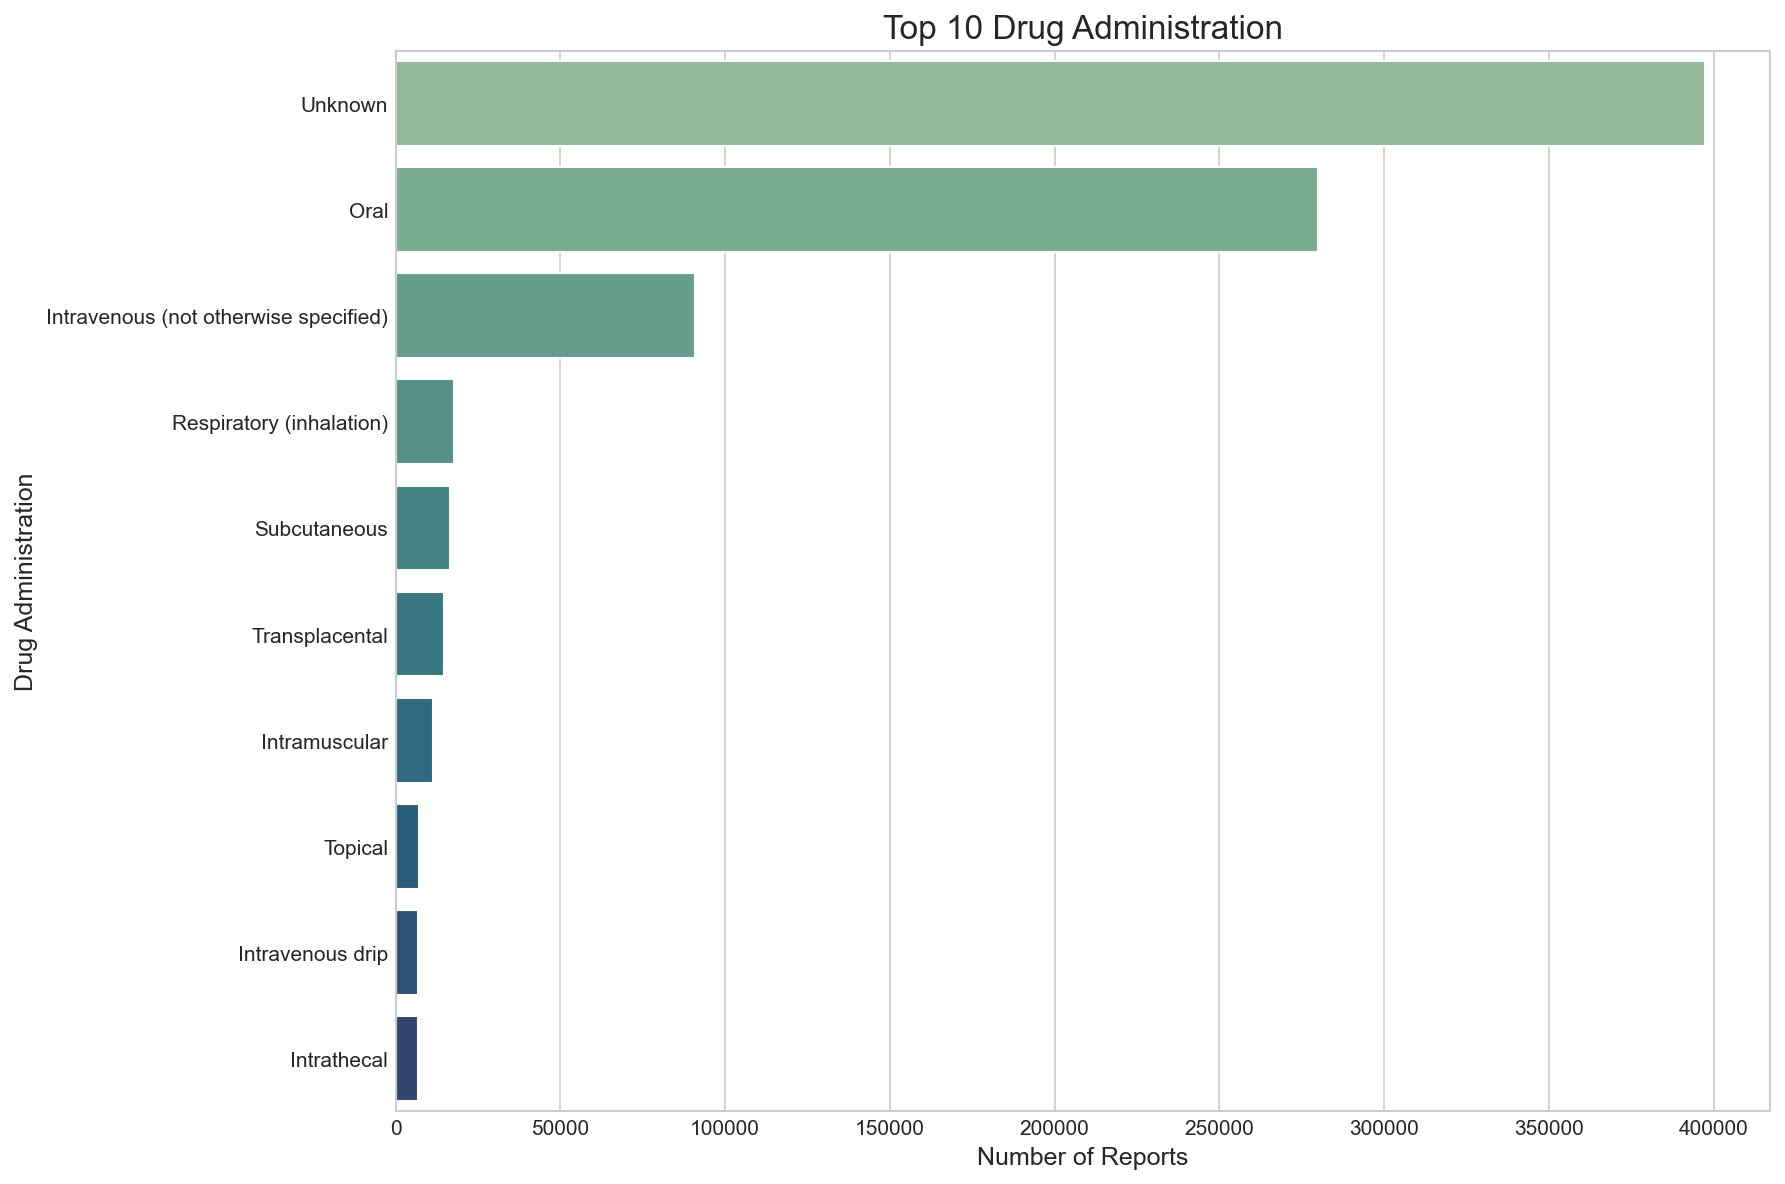

In [94]:
plt.figure(figsize=(12, 8))
top_10_indications = ped_data['drug_administration'].value_counts().nlargest(10)
sns.barplot(x=top_10_indications.values, y=top_10_indications.index, palette='crest')
plt.title('Top 10 Drug Administration', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Drug Administration', fontsize=12)
plt.tight_layout()
plt.show()

In [95]:
print("\nสรุปข้อมูลเบื้องต้นของยา:")
print("บทบาทของยา:")
print(ped_data['drug_characterization'].value_counts())
print("\nยา 5 อันดับแรกที่ถูกรายงาน:")
print(ped_data['medicinal_product'].value_counts().head())
print("\nข้อบ่งใช้ 5 อันดับแรก:")
print(ped_data['drug_indication'].value_counts().head())


สรุปข้อมูลเบื้องต้นของยา:
บทบาทของยา:
drug_characterization
Suspect (the drug was considered by the reporter to be the cause)                                 704273
Concomitant (the drug was reported as being taken along with the suspect drug)                    172690
Interacting (the drug was considered by the reporter to have interacted with the suspect drug)      4433
Name: count, dtype: int64

ยา 5 อันดับแรกที่ถูกรายงาน:
medicinal_product
STRATTERA       17744
YAZ             16926
METHOTREXATE    12695
YASMIN          12476
SINGULAIR       12396
Name: count, dtype: int64

ข้อบ่งใช้ 5 อันดับแรก:
drug_indication
PRODUCT USED FOR UNKNOWN INDICATION         54435
DRUG USE FOR UNKNOWN INDICATION             45346
ATTENTION DEFICIT/HYPERACTIVITY DISORDER    35665
ACUTE LYMPHOCYTIC LEUKAEMIA                 26255
CONTRACEPTION                               25796
Name: count, dtype: int64


### Part 4 Reaction/Outcome Analysis

/tmp/ipykernel_15559/2597625527.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_reactions.values, y=top_10_reactions.index, palette='inferno')


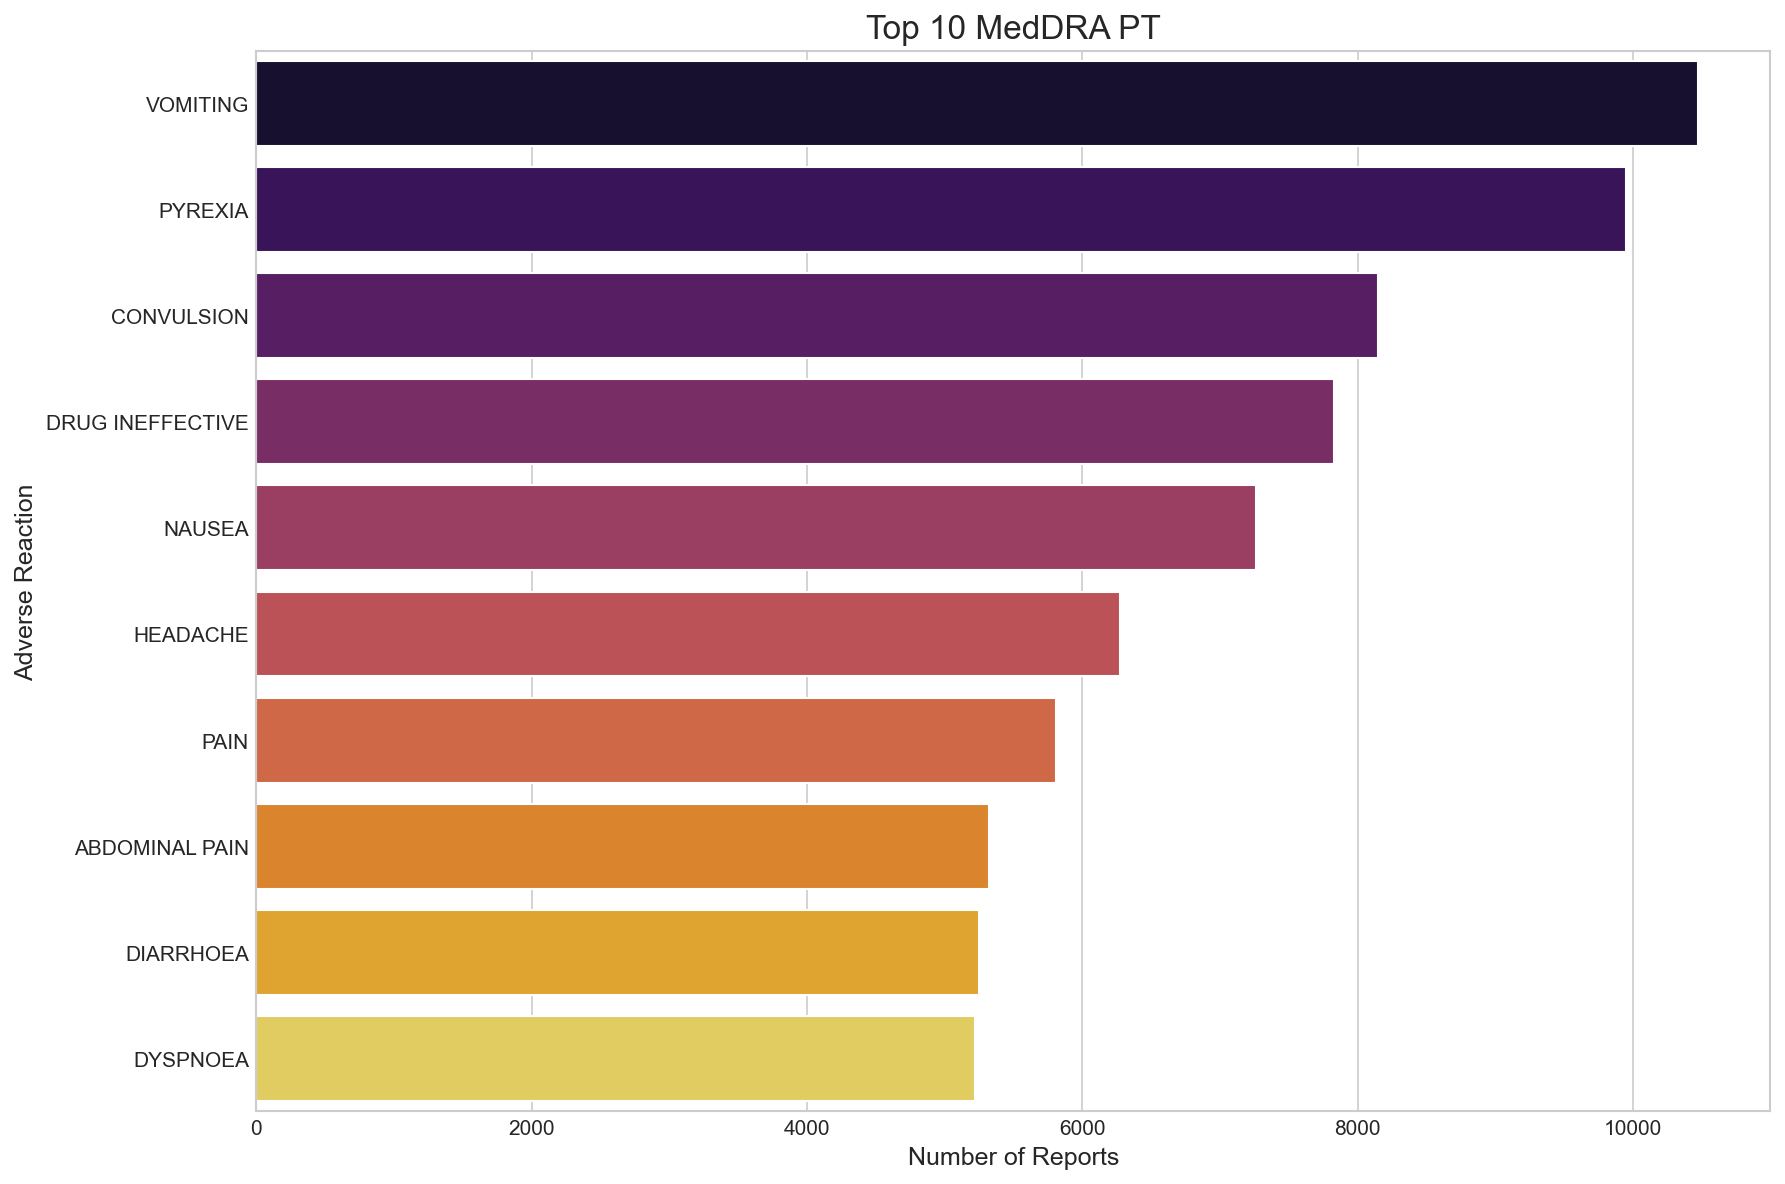

In [96]:
# 4.1 การวิเคราะห์ 10 อาการไม่พึงประสงค์ที่พบบ่อยที่สุด (reaction_meddrapt)
plt.figure(figsize=(12, 8))
top_10_reactions = ped_data['reaction_meddrapt'].value_counts().nlargest(10)
sns.barplot(x=top_10_reactions.values, y=top_10_reactions.index, palette='inferno')
plt.title('Top 10 MedDRA PT', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Adverse Reaction', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'4_1_top_10_reactions.png')
plt.show()

In [97]:
ped_data['serious'].unique()

array(['The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition',
       'The adverse event did not result in any of the above'],
      dtype=object)

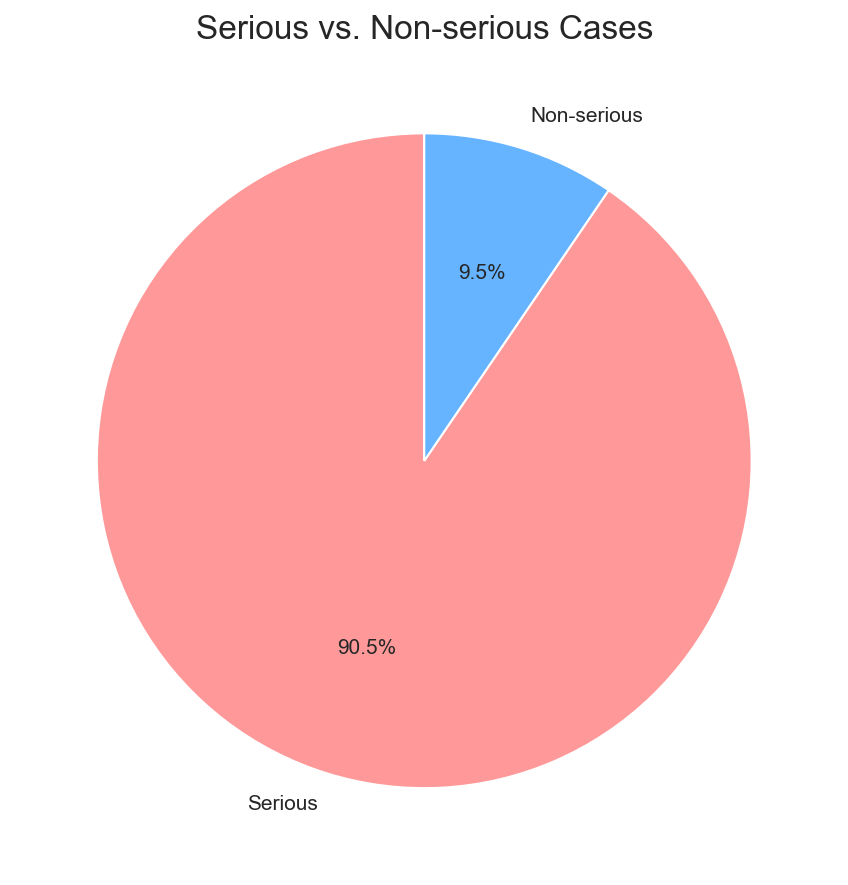

In [98]:
# 4.2 การวิเคราะห์ความรุนแรงของเคส (Serious vs. Non-serious)
label_map = {
    'The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition': 'Serious',
    'The adverse event did not result in any of the above': 'Non-serious'
}

ped_data['serious_short'] = ped_data['serious'].map(label_map)


plt.figure(figsize=(8, 6))
serious_counts = ped_data['serious_short'].value_counts()
plt.pie(serious_counts, labels=serious_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Serious vs. Non-serious Cases', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.savefig(output_file + '4_2_serious_vs_nonserious_short.png')
plt.show()


/tmp/ipykernel_15559/599506181.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='serious_short', data=ped_data, palette='coolwarm')


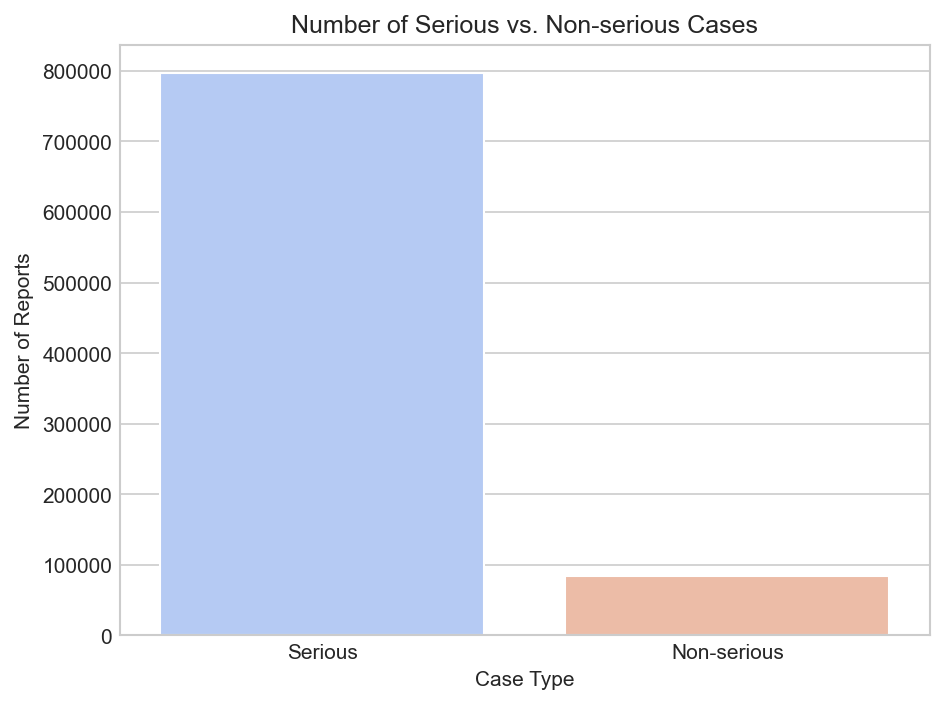

In [99]:
sns.countplot(x='serious_short', data=ped_data, palette='coolwarm')
plt.title('Number of Serious vs. Non-serious Cases')
plt.xlabel('Case Type')
plt.ylabel('Number of Reports')
plt.tight_layout()
plt.show()

/tmp/ipykernel_15559/3223267951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='reaction_outcome',


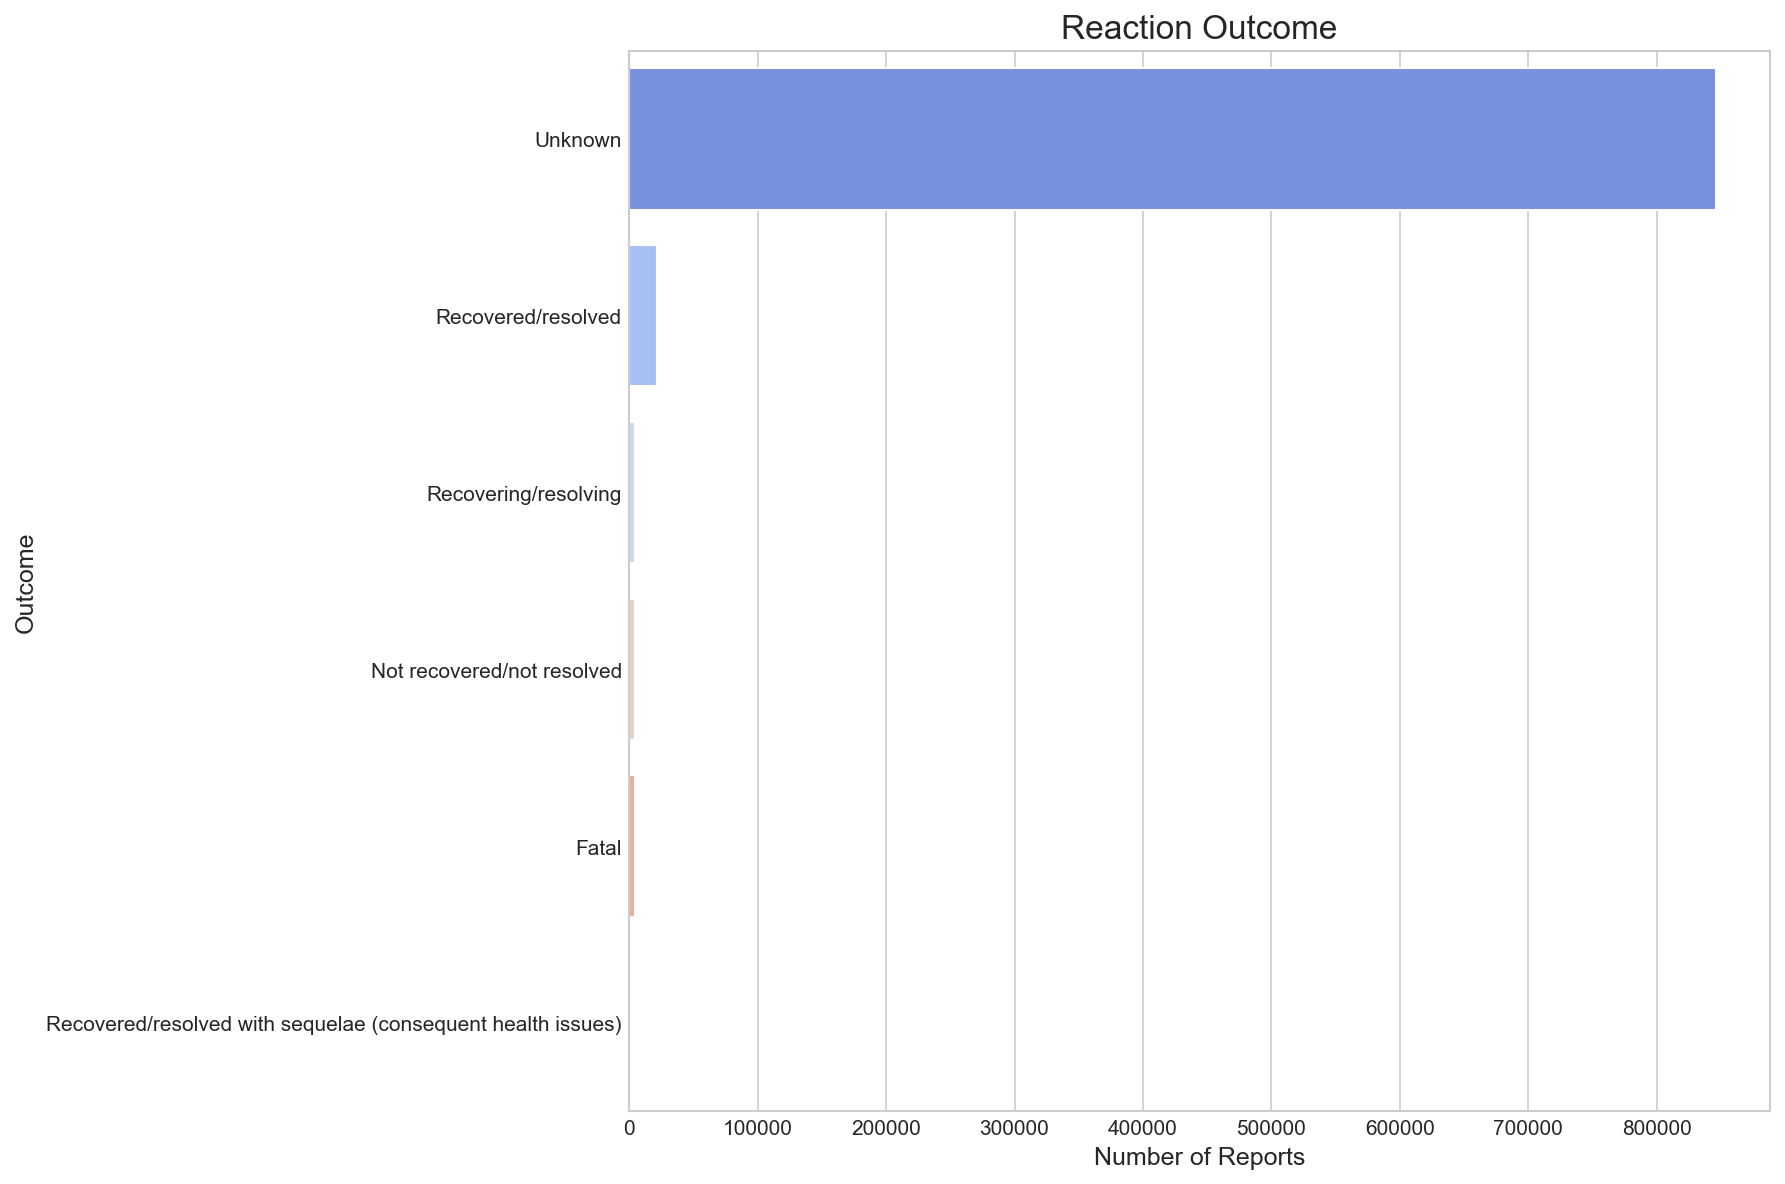

In [100]:
plt.figure(figsize=(12, 8))
sns.countplot(y='reaction_outcome',
              data=ped_data,
              order=ped_data['reaction_outcome'].value_counts().index,
              palette='coolwarm')
plt.title('Reaction Outcome', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'4_3_reaction_outcome.png')
plt.show()

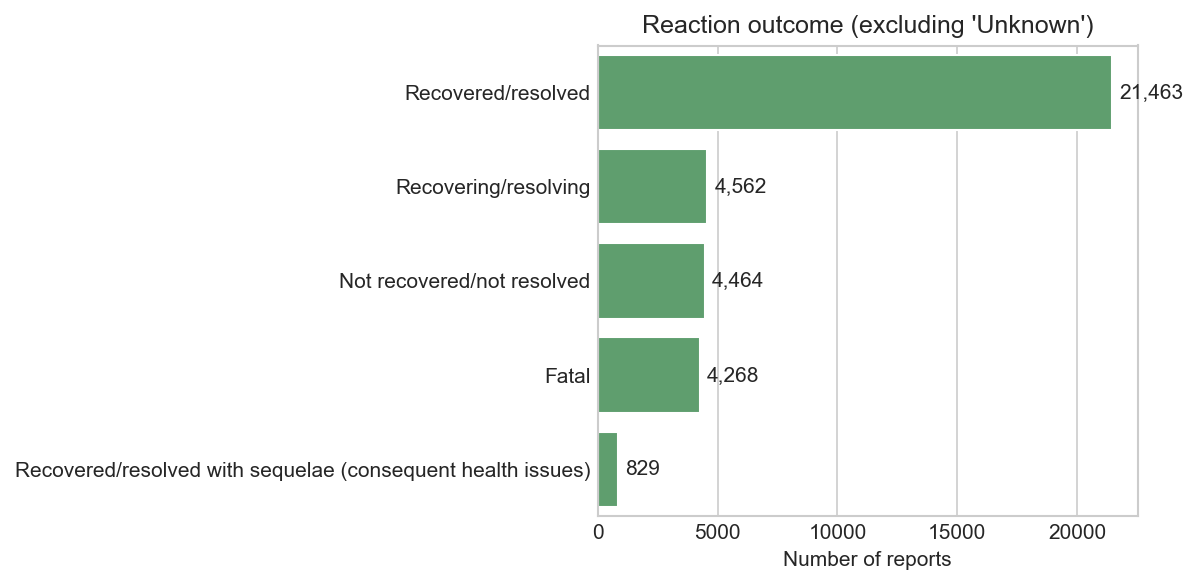

In [101]:
known = ped_data.loc[ped_data['reaction_outcome'] != 'Unknown']
order = known['reaction_outcome'].value_counts().index
plt.figure(figsize=(8,4))
ax = sns.countplot(y='reaction_outcome',
                   data=known,
                   order=order,
                   color="#55A868")

plt.title("Reaction outcome (excluding 'Unknown')")
plt.xlabel("Number of reports"); plt.ylabel("")

for p in ax.patches:
    width  = p.get_width()
    y_pos  = p.get_y() + p.get_height()/2
    ax.text(width + 300,
            y_pos,
            f"{width:,.0f}",
            va='center')

plt.tight_layout()
plt.show()

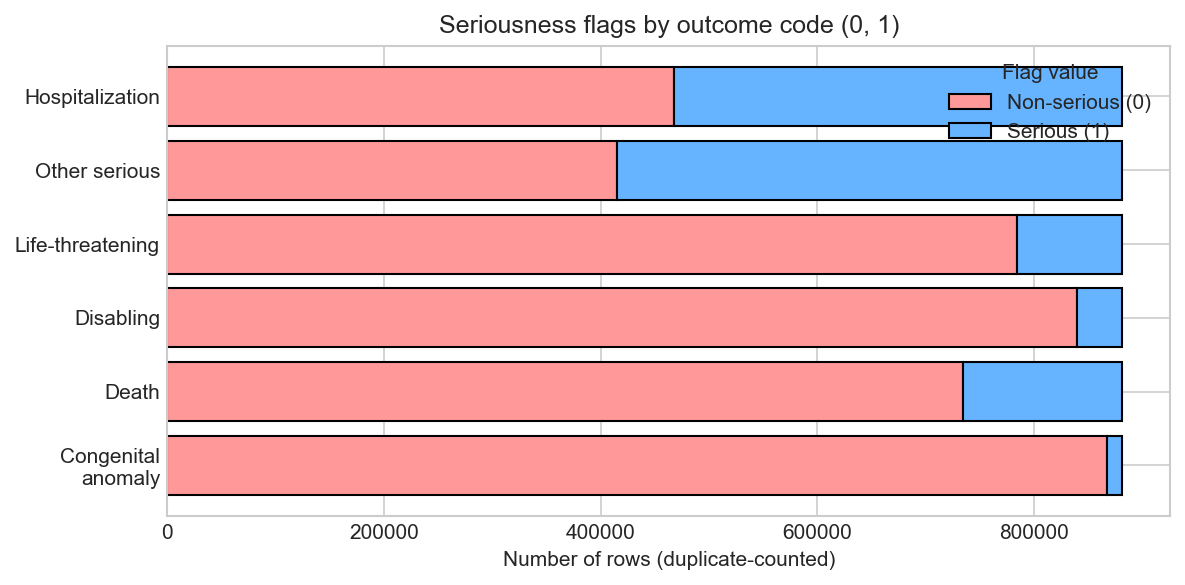

In [104]:
df = ped_data.copy()     

flags = [
    "congenital_anomali",
    "death",
    "disabling",
    "life_threatening",
    "other",
    "hospitalization"
]

disp_names = [             
    "Congenital\nanomaly",
    "Death",
    "Disabling",
    "Life-threatening",
    "Other serious",
    "Hospitalization"
]

# --------------- 2) นับจำนวน 0-1-2 --------------------

count_matrix = (
    df[flags]
    .apply(lambda s: s.value_counts(dropna=False).reindex([0, 1], fill_value=0))
    .T
)
count_matrix.columns = ["Non-serious (0)", "Serious (1)"]
count_matrix.index = disp_names

# --------------- 3) พล็อตแท่งซ้อน --------------------
colors = [ "#ff9999", "#66b3ff"]  

fig, ax = plt.subplots(figsize=(8,4))

bottom = pd.Series([0]*len(count_matrix), index=count_matrix.index)
for col, color in zip(count_matrix.columns, colors):
    ax.barh(
        count_matrix.index,
        count_matrix[col],
        left=bottom,
        color=color,
        edgecolor="k",
        label=col
    )
    bottom += count_matrix[col]

ax.set_xlabel("Number of rows (duplicate-counted)")
ax.set_title("Seriousness flags by outcome code (0, 1)")
ax.legend(title="Flag value")
plt.tight_layout()
plt.show()


In [103]:
print("\nสรุปข้อมูลเบื้องต้นของอาการไม่พึงประสงค์:")
print("5 อาการที่พบบ่อยที่สุด:")
print(ped_data['reaction_meddrapt'].value_counts().head())
print("\nสัดส่วนความรุนแรง:")
print(ped_data['serious'].value_counts())
print("\nผลลัพธ์ของอาการ:")
print(ped_data['reaction_outcome'].value_counts())


สรุปข้อมูลเบื้องต้นของอาการไม่พึงประสงค์:
5 อาการที่พบบ่อยที่สุด:
reaction_meddrapt
VOMITING            10470
PYREXIA              9946
CONVULSION           8146
DRUG INEFFECTIVE     7827
NAUSEA               7259
Name: count, dtype: int64

สัดส่วนความรุนแรง:
serious
The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition    797472
The adverse event did not result in any of the above                                                                                               83924
Name: count, dtype: int64

ผลลัพธ์ของอาการ:
reaction_outcome
Unknown                                                        845810
Recovered/resolved                                              21463
Recovering/resolving                                             4562
Not recovered/not resolved                                       4464
Fatal                                                            4268
Recovered/reso

### Part 5 Relational Analysis

Top 10 Medicinal Product: STRATTERA


/tmp/ipykernel_15559/1063957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reactions_for_top_drugs.values, y=top_reactions_for_top_drugs.index, palette='viridis')


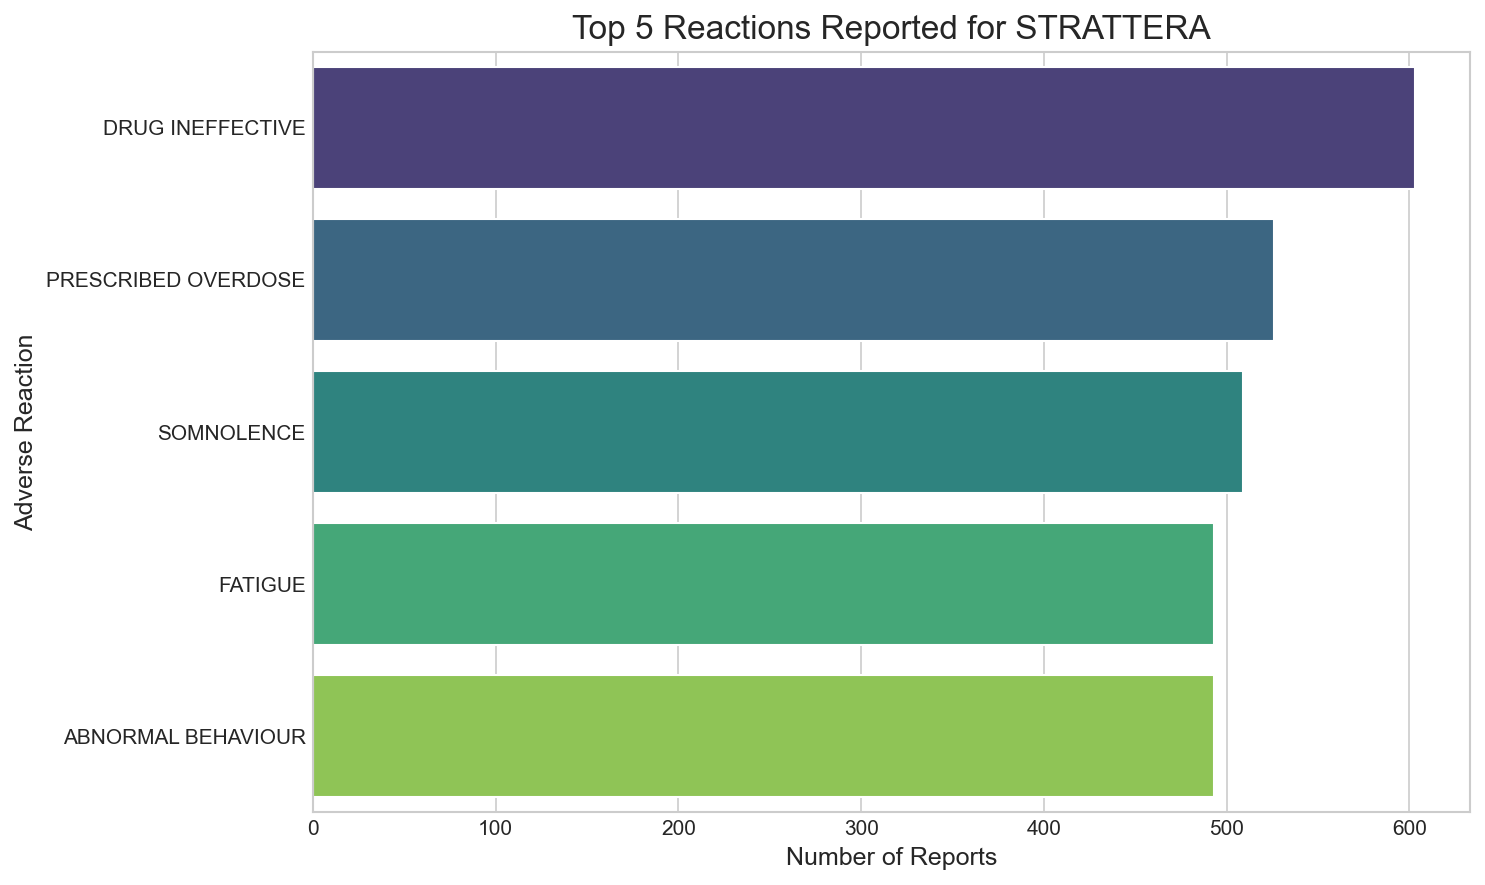

In [105]:
# 5.1 ความสัมพันธ์ระหว่างยาและอาการ (Drug vs. Reaction)
# ค้นหายาที่ถูกรายงานบ่อยที่สุด
top_drug = ped_data['medicinal_product'].mode()[0]
print(f'Top 10 Medicinal Product: {top_drug}')


top_reactions_for_top_drugs = ped_data[ped_data['medicinal_product'] == top_drug]['reaction_meddrapt'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions_for_top_drugs.values, y=top_reactions_for_top_drugs.index, palette='viridis')
plt.title(f'Top 5 Reactions Reported for {top_drug}', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Adverse Reaction', fontsize=12)
plt.tight_layout()
plt.savefig(output_file+'5_1_top_reactions_for_top_drug.png')
plt.show()


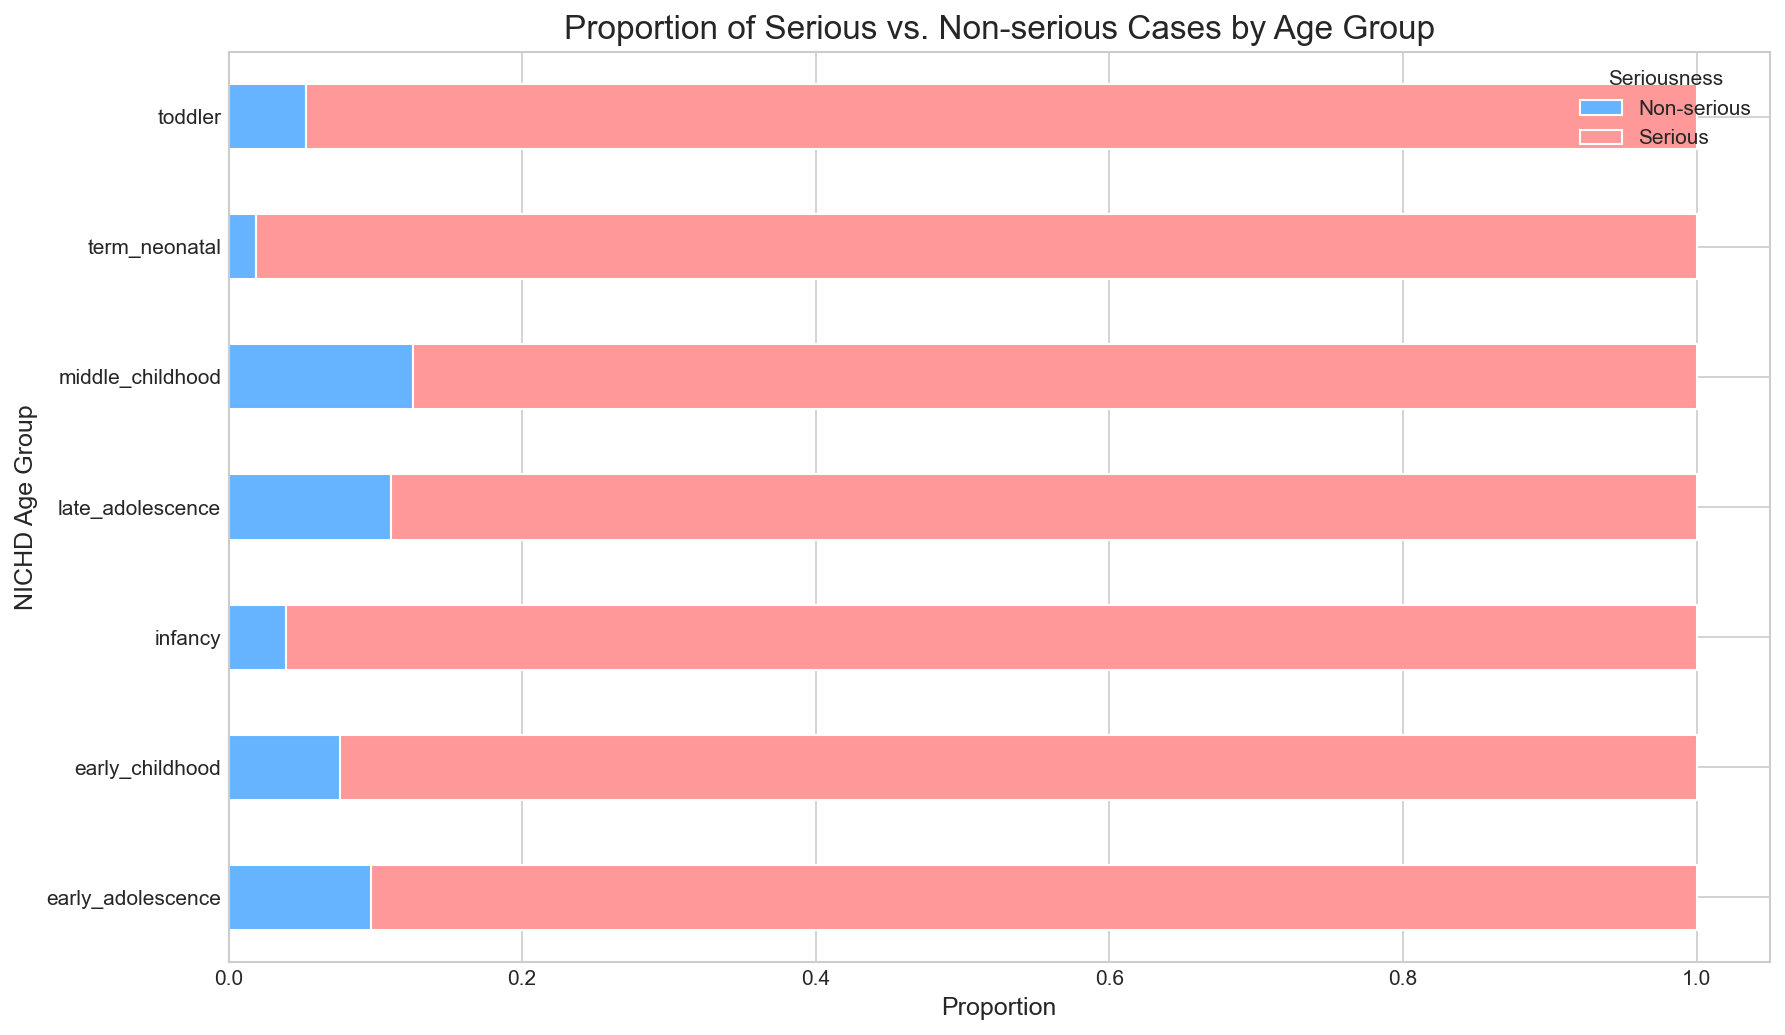

In [106]:
# 5.2 ความสัมพันธ์ระหว่างกลุ่มอายุและความรุนแรง (Age Group vs. Seriousness)
label_map = {
    'The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition': 'Serious',
    'The adverse event did not result in any of the above': 'Non-serious'
}

ped_data['serious_short'] = ped_data['serious'].map(label_map)
# สร้างตารางไขว้ (Crosstab) เพื่อนับจำนวน
age_seriousness_ct = pd.crosstab(ped_data['nichd'], ped_data['serious_short'])

# คำนวณสัดส่วน (ทำให้แต่ละแถวรวมกันได้ 100%)
age_seriousness_prop = age_seriousness_ct.div(age_seriousness_ct.sum(axis=1), axis=0)

# พล็อตกราฟแท่งแบบ 100% stacked bar
age_seriousness_prop.plot(kind='barh', stacked=True, figsize=(12, 7),
                          color=['#66b3ff', '#ff9999'])
plt.title('Proportion of Serious vs. Non-serious Cases by Age Group', fontsize=16)
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('NICHD Age Group', fontsize=12)
plt.legend(title='Seriousness')
plt.tight_layout()
plt.savefig(output_file+'5_2_age_group_vs_seriousness.png')
plt.show()

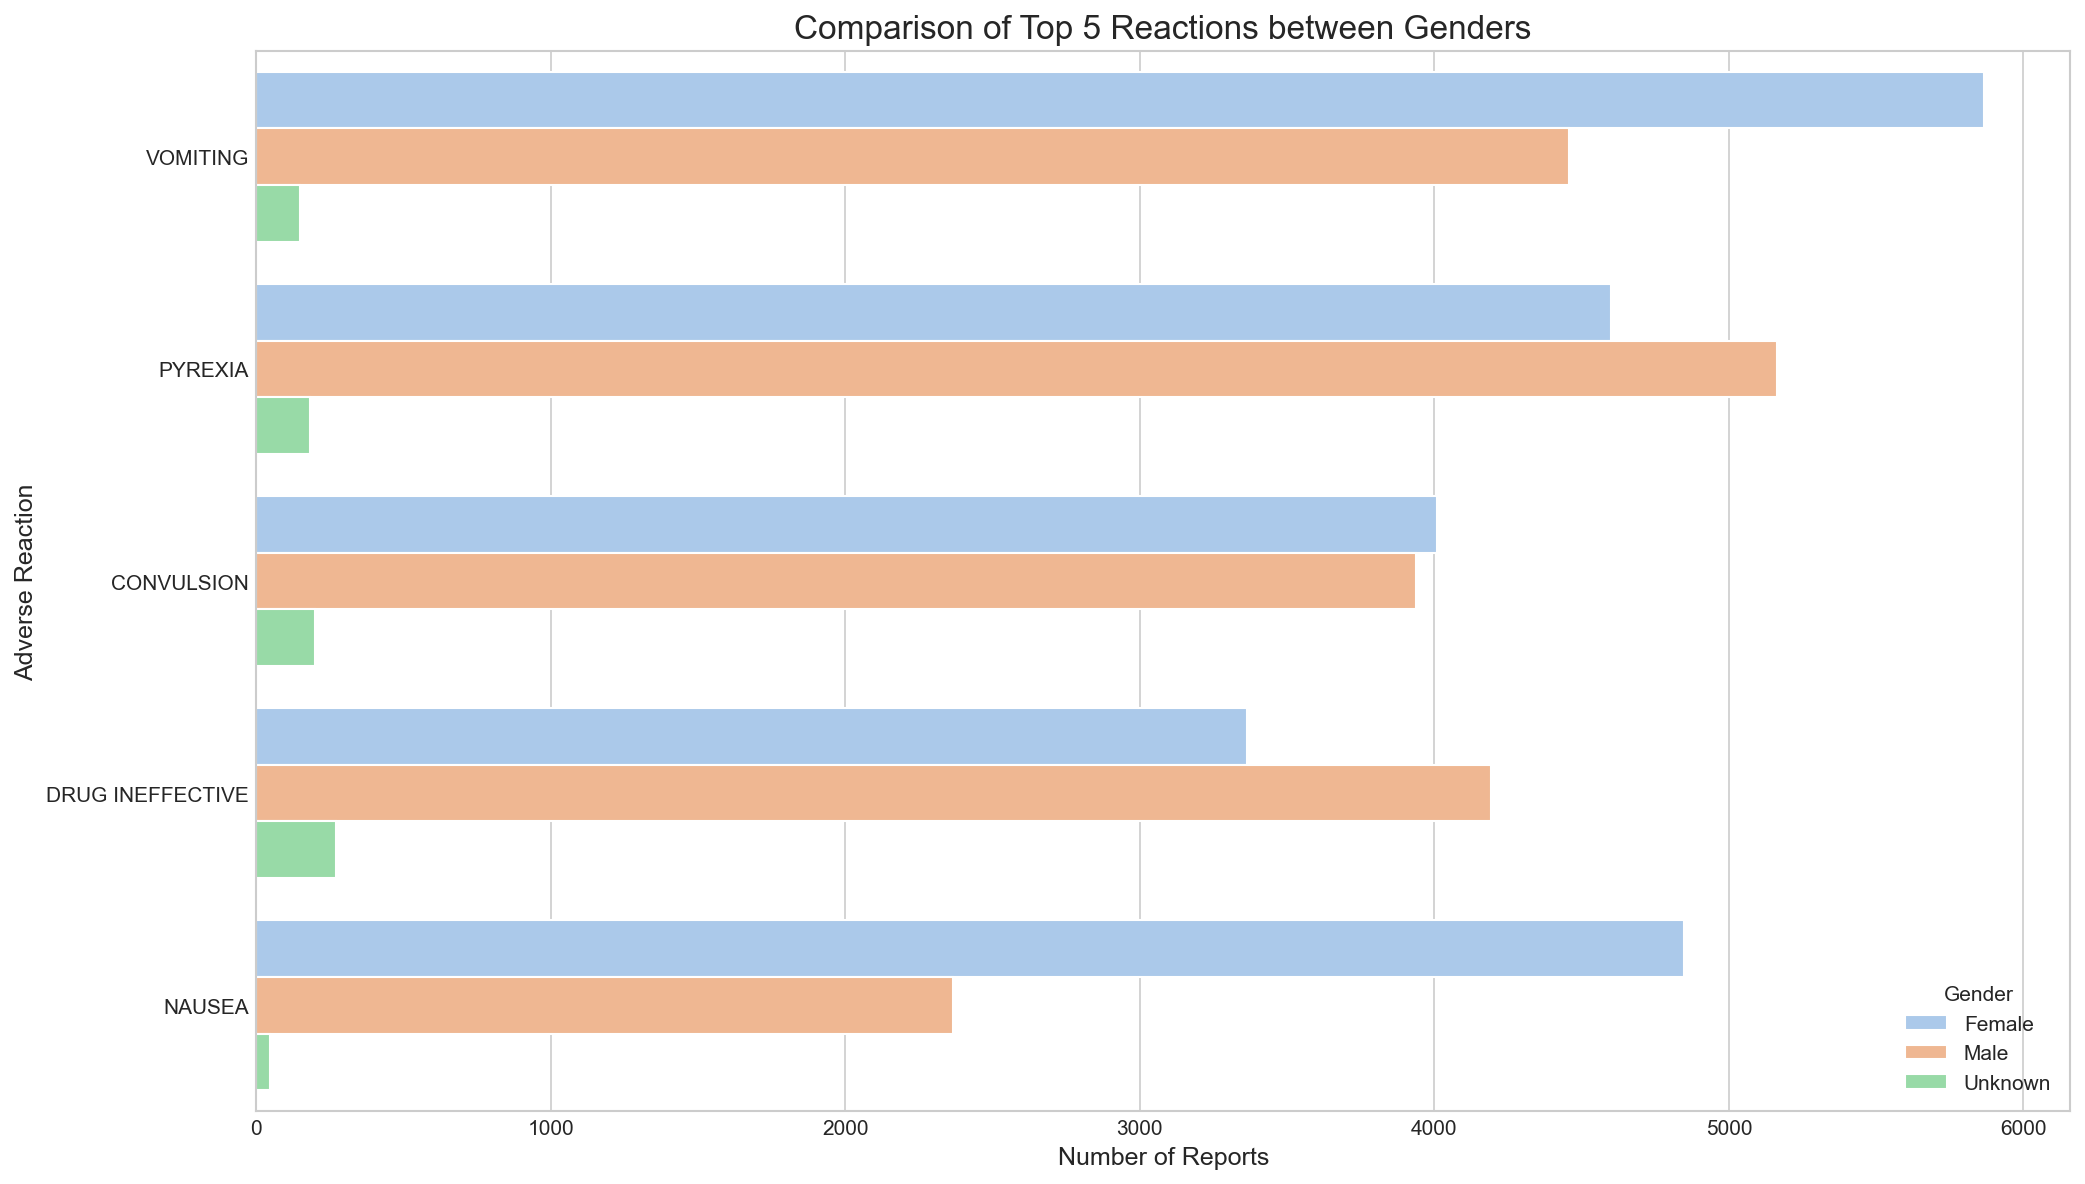

In [107]:
# 5.3 ความสัมพันธ์ระหว่างเพศและอาการ (Gender vs. Reaction)
# เลือก 5 อาการที่พบบ่อยที่สุดโดยรวม
top_5_overall_reactions = ped_data['reaction_meddrapt'].value_counts().nlargest(5).index

# กรองข้อมูลเฉพาะ 5 อาการนั้น
ped_data_top_reactions = ped_data[ped_data['reaction_meddrapt'].isin(top_5_overall_reactions)]

plt.figure(figsize=(14, 8))
sns.countplot(y='reaction_meddrapt', hue='patient_sex', data=ped_data_top_reactions,
              order=top_5_overall_reactions, palette='pastel')
plt.title('Comparison of Top 5 Reactions between Genders', fontsize=16)
plt.xlabel('Number of Reports', fontsize=12)
plt.ylabel('Adverse Reaction', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig(output_file+'5_3_gender_vs_reaction.png')
plt.show()


ข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1 ในแต่ละคอลัมน์):
                    Count of 0  Count of 1
congenital_anomali      867366       14030
disabling               839950       41446
life_threatening        784248       97148
death                   734326      147070
other                   414990      466406
hospitalization         467477      413919


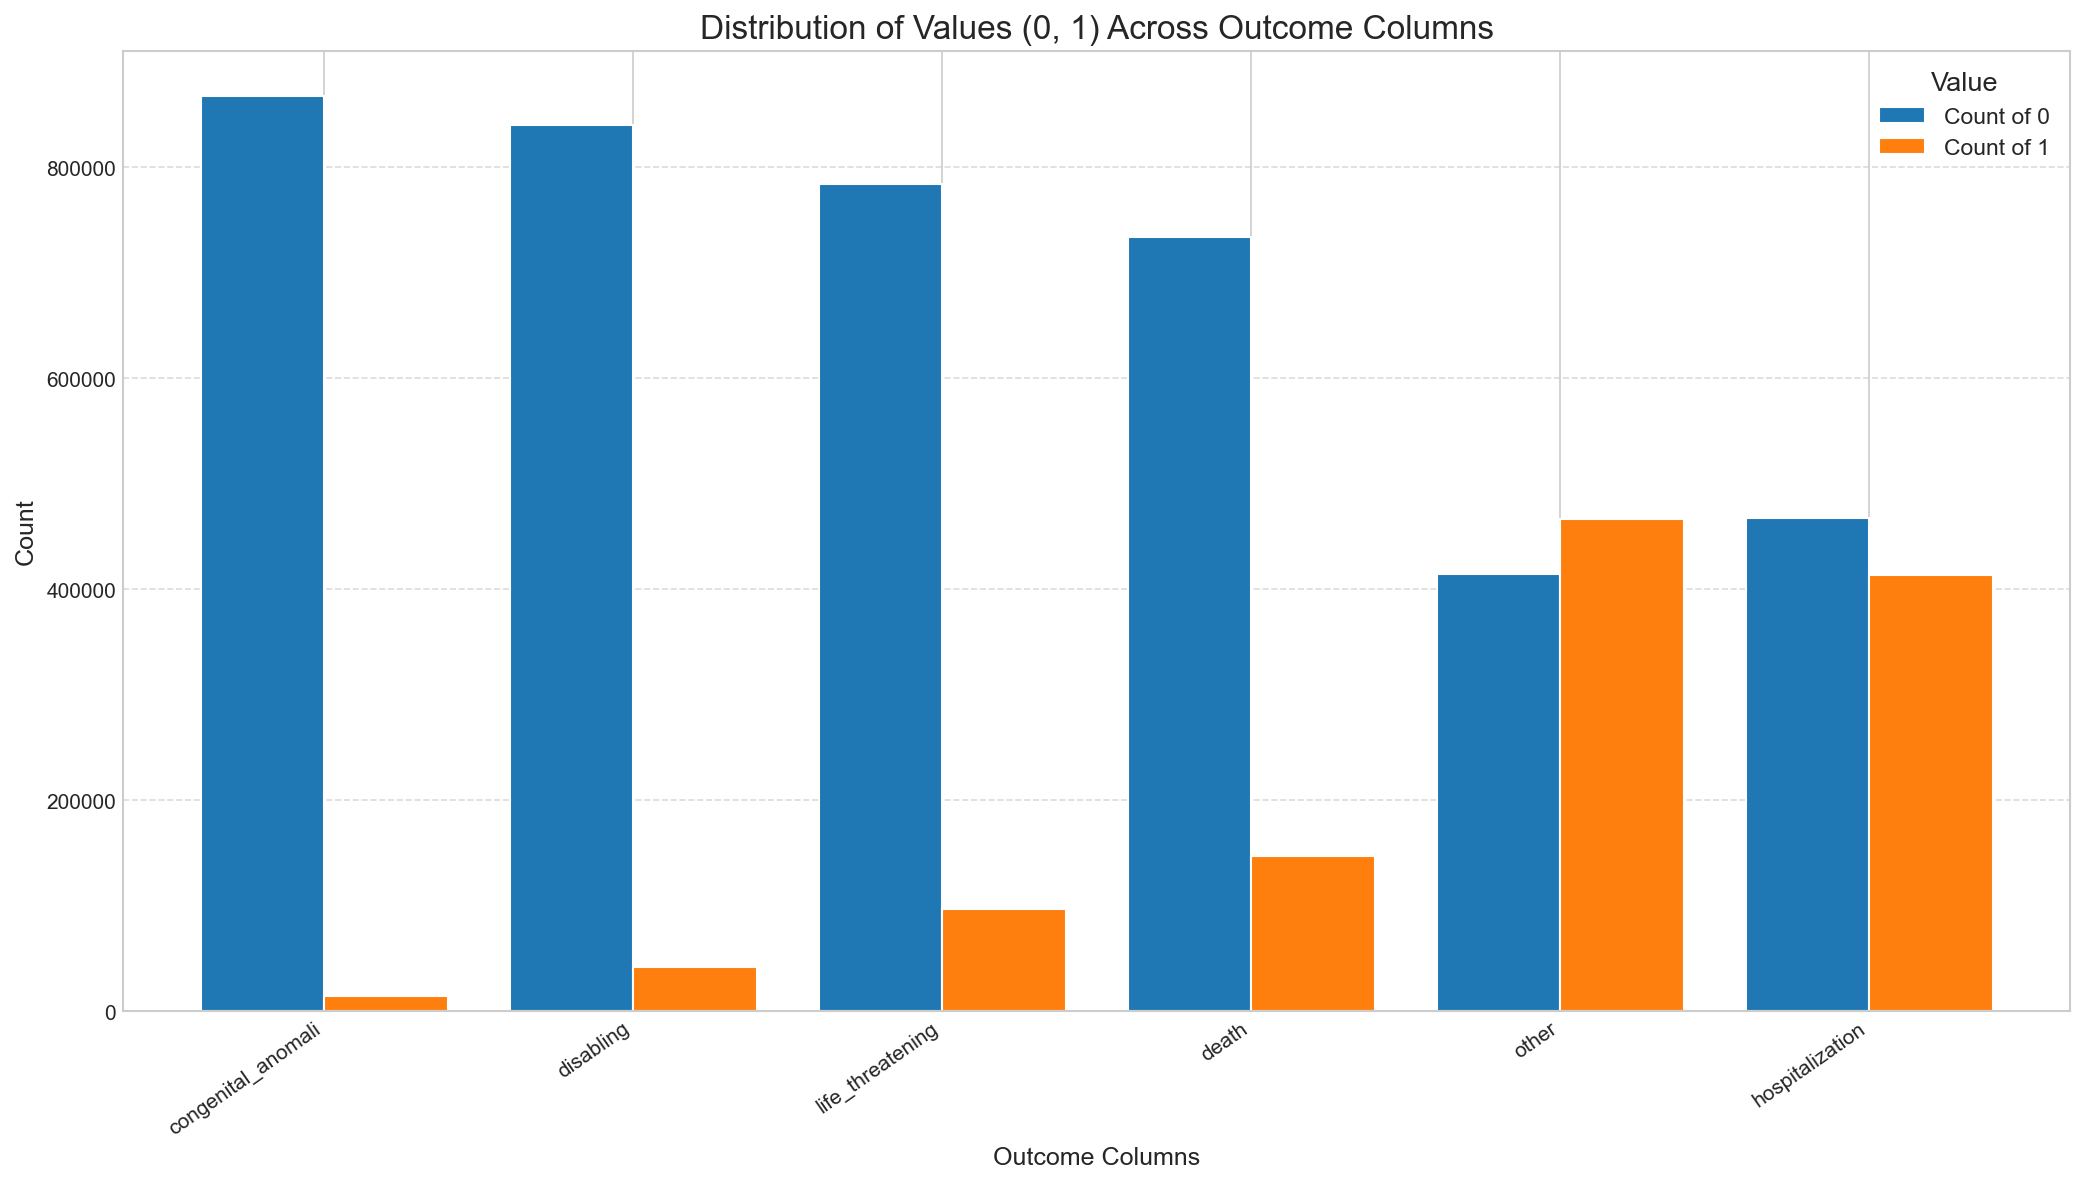

In [110]:
outcome_cols = ['congenital_anomali', 'disabling', 'life_threatening', 'death', 'other', 'hospitalization']
counts_data = {}

for i in outcome_cols:
    counts = ped_data[i].value_counts().reindex([0, 1], fill_value=0).sort_index()
    counts_data[i] = counts

plot_df = pd.DataFrame(counts_data)
plot_df_transposed = plot_df.transpose()
plot_df_transposed.columns = ['Count of 0', 'Count of 1']

print("\nข้อมูลที่เตรียมสำหรับ plot (จำนวนของ 0, 1 ในแต่ละคอลัมน์):")
print(plot_df_transposed)

plt.style.use('seaborn-v0_8-whitegrid')
ax = plot_df_transposed.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Distribution of Values (0, 1) Across Outcome Columns', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Outcome Columns', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Value', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(output_file+'6_1_outcome_distribution.png')
plt.show()

In [119]:
outcome_cols = [
    'congenital_anomali',
    'disabling',
    'life_threatening',
    'death',
    'other',
    'hospitalization'
]

positive_cnt = df[outcome_cols].sum()       
print("จำนวนแถวที่เป็น 1:\n", positive_cnt)

counts_table = (
    df[outcome_cols]
    .apply(pd.Series.value_counts)  
    .T                               
    .fillna(0)
    .astype(int)
    .rename(columns={0: 'count_0', 1: 'count_1'})
)

print("ตารางสรุป 0/1 ต่อคอลัมน์\n", counts_table)

counts_table['pct_1'] = counts_table['count_1'] / len(df) * 100
counts_table['pct_0'] = counts_table['count_0'] / len(df) * 100


จำนวนแถวที่เป็น 1:
 congenital_anomali     14030
disabling              41446
life_threatening       97148
death                 147070
other                 466406
hospitalization       413919
dtype: int64
ตารางสรุป 0/1 ต่อคอลัมน์
                     count_0  count_1
congenital_anomali   867366    14030
disabling            839950    41446
life_threatening     784248    97148
death                734326   147070
other                414990   466406
hospitalization      467477   413919


In [120]:
counts_table

,count_0,count_1,pct_1,pct_0
congenital_anomali,867366,14030,1.591793,98.408207
disabling,839950,41446,4.702313,95.297687
life_threatening,784248,97148,11.022060,88.977940
death,734326,147070,16.686030,83.313970
other,414990,466406,52.916737,47.083263
hospitalization,467477,413919,46.961752,53.038248


In [130]:
ped_data.loc[(ped_data[outcome_cols].sum(axis=1) == 0.0) & ((ped_data['drug_characterization_short']=='Suspect')), outcome_cols]


,congenital_anomali,disabling,life_threatening,death,other,hospitalization
8,0,0,0,0,0,0
13,0,0,0,0,0,0
14,0,0,0,0,0,0
15,0,0,0,0,0,0
16,0,0,0,0,0,0
...,...,...,...,...,...,...
1754125,0,0,0,0,0,0
1754126,0,0,0,0,0,0
1754127,0,0,0,0,0,0
1754128,0,0,0,0,0,0
